Product Recommendation System for e-commerce beauty company


Recommendation System - Part I

In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD

In [4]:
#Loading the dataset
data = """
UserId,ProductId,Rating,Timestamp
A39HTATAQ9V7YF,0205616461,5.0,1369699200
A3JM6GV9MNOF9X,0558925278,3.0,1355443200
A1Z513UWSAAO0F,0558925278,5.0,1404691200
A1WMRR494NWEWV,0733001998,4.0,1382572800
A3IAAVS479H7M7,0737104473,1.0,1274227200
AKJHHD5VEH7VG,0762451459,5.0,1404518400
A1BG8QW55XHN6U,1304139212,5.0,1371945600
A22VW0P4VZHDE3,1304139220,5.0,1373068800
A3V3RE4132GKRO,130414089X,5.0,1401840000
A327B0I7CYTEJC,130414643X,4.0,1389052800
A1BG8QW55XHN6U,130414643X,5.0,1372032000
AIFAAVTUYHEHB,130414643X,4.0,1378252800
AVOGV98AYOFG2,1304146537,5.0,1372118400
A22VW0P4VZHDE3,130414674X,5.0,1371686400
AVOGV98AYOFG2,1304168522,5.0,1372118400
A6R426V4J7AOM,1304168522,5.0,1373414400
A22VW0P4VZHDE3,1304174778,5.0,1372896000
AKGB62WGF35J8,1304174778,5.0,1372896000
A22VW0P4VZHDE3,1304174867,5.0,1373068800
A1BG8QW55XHN6U,1304174867,5.0,1372291200
A1BG8QW55XHN6U,1304174905,5.0,1372291200
A22VW0P4VZHDE3,1304196046,5.0,1372896000
A22VW0P4VZHDE3,1304196062,5.0,1372896000
A3A4C2K3TWDAO5,1304196070,1.0,1378425600
A3FV2Q7WPZMQPV,1304196135,5.0,1375488000
A22VW0P4VZHDE3,1304196135,5.0,1372896000
A1RXI3A1E99112,1304351475,5.0,1405296000
A26QL1FBQO9C0E,1304351475,5.0,1392076800
A19KEEVZYO1KO6,1304351475,4.0,1388707200
A1F6HRR58TQ2R0,1304351475,5.0,1394928000
AVQP6PO1NK0IJ,1304351475,1.0,1389657600
A32IWHU4TUEQZR,1304351475,4.0,1383523200
ASPJCWRXUOYYY,1304351475,5.0,1392681600
A1LAW520BT5AM0,1304351475,1.0,1392422400
A3SWQ2QQ7JBPFA,1304351475,5.0,1402790400
A2D7CPCZH5VFVZ,1304351475,1.0,1396742400
A274NIJWOQWE30,1304351475,5.0,1385251200
A2OMU0R0VM5O9I,1304351475,1.0,1397606400
A2YFDS6DYGFLVQ,1304351475,5.0,1405036800
AKA7T9TPISJ26,1304351475,1.0,1399680000
AN33X95J5460X,1304351475,4.0,1395187200
A2UEOW698J0SSR,1304351475,5.0,1397779200
A22ZFXQE8AWPEP,1304482596,1.0,1383177600
A6R426V4J7AOM,1304482596,5.0,1384992000
A9ZNJ2AXPO652,1304482634,2.0,1386028800
A169NC0ZW6XKRD,1304482685,3.0,1391558400
AZWRTJPN7NXT,1304482685,5.0,1383004800
A22ZFXQE8AWPEP,1304482685,1.0,1383177600
AH344ZAN5GNOM,1304482685,5.0,1391558400
A1YQUT1H2ENJ8U,1304482685,4.0,1383004800
A22VW0P4VZHDE3,1304482685,5.0,1384128000
A6R426V4J7AOM,1304488608,5.0,1384732800
A22ZFXQE8AWPEP,1304495396,1.0,1384992000
A6R426V4J7AOM,1304495396,5.0,1384992000
A3C744AK5A6MMI,1304495396,5.0,1385856000
A2H6SFTV2892Z8,1304511073,5.0,1384992000
A225CH9TTQPC4B,1304511073,1.0,1393891200
A2F6NPTGDMFXN9,1304511073,1.0,1385596800
A2H6SFTV2892Z8,1304511081,5.0,1384992000
A1DC0DSF3H3BCW,1304511081,3.0,1391817600
A3TR91FJ4MNFY9,1304511081,5.0,1391558400
A22ZFXQE8AWPEP,1304511111,1.0,1384992000
A3IANSH41YHFP1,1304511111,5.0,1389830400
A2NRG4NQMLHDJQ,1304511111,1.0,1385769600
A6R426V4J7AOM,130451112X,5.0,1383868800
A2H6SFTV2892Z8,1304511138,5.0,1384992000
A22ZFXQE8AWPEP,1304511138,1.0,1384992000
A32G79IU2NJ2HS,1304511138,1.0,1388188800
A2H6SFTV2892Z8,1304511146,5.0,1384992000
A3L2VTHD6W1E2Z,1304511146,2.0,1386201600
A3L2VTHD6W1E2Z,1304511154,1.0,1386201600
A1BG8QW55XHN6U,1304511154,5.0,1384732800
A2H6SFTV2892Z8,1304622193,5.0,1384992000
A22VW0P4VZHDE3,1304622193,5.0,1385856000
A2H6SFTV2892Z8,1304622223,5.0,1384992000
A6R426V4J7AOM,1304622428,5.0,1384992000
A15THVWZS6GQZY,1304622428,5.0,1388102400
A1BG8QW55XHN6U,1304622452,5.0,1385424000
A2H6SFTV2892Z8,1304622460,5.0,1384992000
A1VCW66KPTNUV8,1304622622,1.0,1385424000
AO5JB67V93FBL,1304622622,5.0,1388620800
A1GWD6BDCLGC82,1304622622,1.0,1388016000
AJ85OD05LNNUY,1304622657,2.0,1404172800
A1E5CS6UI1LWQF,1304622657,5.0,1390608000
A1SWCNGOR3GMOQ,1304622657,5.0,1393286400
A1BG8QW55XHN6U,1304622657,5.0,1385596800
A22ZFXQE8AWPEP,1304622665,1.0,1386028800
A22ZFXQE8AWPEP,1304624498,1.0,1385683200
A2IOZRH02O4C9S,1304624498,1.0,1392076800
A2H6SFTV2892Z8,1304624544,5.0,1384992000
A1RGXKJ4RFIOCX,1304624544,1.0,1394755200
A11OEJ4R1PDTLN,1304624544,1.0,1391385600
A22ZFXQE8AWPEP,1304651029,1.0,1386028800
A1BG8QW55XHN6U,1304651029,5.0,1385424000
A1BG8QW55XHN6U,1304651088,5.0,1385424000
A1BG8QW55XHN6U,130465110X,5.0,1385424000
A1BG8QW55XHN6U,1304651118,5.0,1385424000
A6R426V4J7AOM,1304651347,5.0,1385856000
A1BG8QW55XHN6U,1304665704,5.0,1385596800
AZ4FR14IPKML7,1304665720,5.0,1388966400
A251DS38L87XWF,1304665720,1.0,1391299200
A1BG8QW55XHN6U,1304665720,5.0,1385596800
A22ZFXQE8AWPEP,130466578X,1.0,1386028800
A1Z03R982SX8V2,1403790965,4.0,1389916800
A1ZY0K46FYOTB6,1403790965,5.0,1357603200
A3MAATZ091QZGE,1403790965,5.0,1372550400
A35XCJ5P6ZKRE9,1403790965,5.0,1340755200
A2B3YKKXVN28TW,1403790965,5.0,1385856000
A2RDR51FRB58LD,1403790965,5.0,1328918400
A2MSCG0YX85RL4,1403790965,5.0,1375833600
A2P8AUMTM6O605,1403790965,5.0,1403913600
A3SN6TKIXQI7RP,1403790965,5.0,1375488000
A1MLJHYS35C4X6,1403790965,5.0,1373414400
A2FTLN4PYZE7S6,1403790965,5.0,1403827200
ATPHIBSTV1NY5,1412759676,5.0,1356739200
A1QWS6V26JZ5OX,1412759676,5.0,1371340800
A1VK4ALI1QOF5U,1412759676,4.0,1356912000
A1GIXQUBPA0DPT,1412759676,5.0,1298246400
A22L53OZ7IDQX3,1412759676,5.0,1310774400
AAOU507M8SF9E,1412759676,5.0,1320019200
A2DIOCFQZQFD9O,1451646526,4.0,1331510400
A17Z7DO3IFHZOE,1457982633,5.0,1399593600
A120LZ9VNR3YI0,1572671203,3.0,1294617600
A39QH03VD9U048,1572671203,3.0,1373155200
A95YCV8FK2LCM,1572671203,4.0,1295395200
AP57TEKK91CIM,1572671203,5.0,1375833600
A3OQ3FVYBU7SBD,1879187396,5.0,1382400000
A2GDJP70RVLDKY,1906987238,5.0,1373068800
A2BQ8DVGEGWAFY,1929099886,4.0,1355011200
A2A0EW34FZH9Z7,1987958179,5.0,1394755200
A1D6UAVLQUS41B,3222000565,5.0,1381449600
A2VRUBSVHDDOU9,3222000565,5.0,1382486400
A276N142RFK6EF,3222000565,5.0,1404345600
A2HNQ3JHXDSVMW,322700075X,3.0,1361491200
ADURH4ZDRMZV6,3227001055,4.0,1369440000
AXVLSEEYTC4Z9,3227001055,1.0,1372809600
AGGXC77INUISD,3227001055,5.0,1405296000
A10REFE1TW3ZVT,3227001381,5.0,1350691200
A3M7ROZKQW6F69,3227001381,4.0,1351814400
A271KYL82709TY,3227001381,5.0,1382400000
A1OON4OPP58E26,3227001381,5.0,1372204800
A3COLQK8Y9V9A5,3227001381,5.0,1345680000
A28H0PAQPYKN94,3227001381,5.0,1371859200
AYI1LDJYGG0ZK,3227001381,4.0,1357257600
A3T5EYVSBN3QQX,3227001381,2.0,1363219200
A3E4N6O6WC8LEX,3227001381,5.0,1323216000
A30IURTQM5NNA4,3227001381,5.0,1376524800
A100GYE1W4OXZ8,3227001381,5.0,1372032000
A1ZWS1H6H06Y2J,3227001381,5.0,1342915200
A3BMQUL5QATQIW,3227001381,5.0,1368057600
AI5JNFT6YBQQY,3227001381,5.0,1362873600
A2H79ANDK766S1,3227001381,4.0,1404432000
A3LO1A9N0F0TXE,3227001381,5.0,1345507200
A2JYNUBR7H2W41,3227001381,5.0,1339027200
A2O9UKJ2FR0GZ4,3227001381,5.0,1389225600
A1O5Z4ZKPMHORQ,3227001381,5.0,1326499200
A366PG2T9L9VSW,3227001381,2.0,1373068800
A11AT6B3912DCU,3227001381,5.0,1356652800
A2RCLQ2PS3PN8H,3227001381,5.0,1384300800
A445U3NN5XBYK,3227001381,3.0,1374451200
A3GAMJUEB4A4J9,3227001381,5.0,1381363200
A7BCFTL2PU1NZ,3227001381,5.0,1359676800
A87X19PQJFYFA,3292000971,5.0,1371859200
A2F5SHIP4HF9,3292000971,5.0,1371254400
A305WEYT5UZKCZ,3292000971,5.0,1365724800
A2E8U0H25VGG3O,3423470476,1.0,1322438400
A2S1HDSZ0OGW1M,360211600X,5.0,1332028800
AFRE5F3MKUKME,360211600X,1.0,1392595200
A11Q1HQ84F8POH,4057362797,1.0,1327017600
A2CCV112TWLK7A,4057362843,5.0,1357084800
A2099WPFJKJKZC,4057362886,4.0,1377043200
A1T8YQ4FFMWQPC,4057362894,5.0,1387065600
AZLE2XFH3JUNG,4057362894,5.0,1367193600
A99JEK1Z8S1T0,4057362967,5.0,1404864000
A2OCBW6UQ8GS7L,4057363823,5.0,1252281600
AI6IXAB24N30W,4057363823,1.0,1264118400
AZLE2XFH3JUNG,4057368825,5.0,1367193600
A2GPHFP5QKF0CO,4057368825,2.0,1374192000
A2ZZ26N7K9BSFB,4057368825,5.0,1376956800
A1MID7V80H36FX,4057553908,2.0,1365724800
A10ZKDOZOSH219,4057553908,5.0,1347235200
A1CNSLLYW5A8YB,5297000963,5.0,1397433600
ARUSOE3CJ7TNF,5297000963,1.0,1395619200
A2Z9QP4MZ2HXCZ,5357954771,3.0,1376352000
ACZ94JB8BFMJ9,5357954771,5.0,1385251200
A36ZKFLSDE8WX5,5357954771,5.0,1270252800
AVCSVH9L0BPIF,5357954771,5.0,1341532800
A2VF4TALLW8G9,535795531X,5.0,1396915200
A3UFMKLD77O21S,535795531X,5.0,1302652800
A1QPQIJVS0JC5Y,535795531X,5.0,1235606400
A2UQZD76FKVQ6D,535795531X,5.0,1335225600
A1LNS0V7YBBJJE,535795531X,5.0,1359158400
A3B0M39TDARC6X,535795531X,5.0,1397347200
A1ZNOA9OHWIVMH,535795531X,5.0,1347321600
A15ELVI3I6G1SQ,535795531X,5.0,1329782400
A35ELDPD0N7T0U,535795531X,5.0,1354924800
A1B07LXV78TWZ,535795531X,5.0,1311724800
A29LZJWIY7KJZR,535795531X,5.0,1341532800
A13IIHXY0QX4Y4,535795531X,3.0,1356566400
A1AM400PUH70WO,535795545X,5.0,1371513600
A18X2IP46I5JB8,535795545X,5.0,1370476800
A2DT0SAXS5DIL8,535795545X,5.0,1294444800
A29AQSCFQ1OZ9R,535795545X,5.0,1360022400
A225BCNNIG03JT,535795545X,3.0,1316995200
A3590W7FEAGQY4,535795545X,5.0,1396051200
A1U6E8IJEATCYM,535795545X,5.0,1356998400
A1X1X91COEBHVI,5357955743,5.0,1395014400
A2RNK4TW1FPXEF,5357955751,5.0,1404259200
AYHZNXRPOHMO2,5357955786,5.0,1385078400
A3NIHH9X6L3RRM,5357955786,5.0,1396915200
A1UDWB8WFFGN55,5357955786,5.0,1361923200
A20LFHVP5CMQ1,5357955786,5.0,1394409600
A16495HOSCEV0N,5357955832,5.0,1403913600
A22ET3HEUN5JNP,5357955867,2.0,1342656000
A1NNJ0MNFIF3Z8,5357955867,5.0,1147046400
A2C55XULIQ3F8I,5357955867,4.0,1141948800
AOJRTF5PJMIR6,5357955867,5.0,1354147200
ACUB5EB5F72B9,5357955867,5.0,1360454400
A1XD9BN1CBR8U4,5357955905,5.0,1195948800
A2K18LH5HC6K9B,5357955905,5.0,1295654400
A38JQUXZTKKHQP,5357955905,4.0,1313884800
A1QMSSMUBUXX5S,5357955905,5.0,1368057600
A3VUS3HC1CCVOQ,5357955948,4.0,1358726400
A19VNE2EF1QYNE,5357955948,1.0,1361923200
"""
amazon_ratings = pd.read_csv(StringIO(data))
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [5]:
amazon_ratings.shape

(224, 4)

In [6]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
3227001381,25
1304351475,16
535795531X,12
1403790965,11
535795545X,7
1412759676,6
1304482685,6
5357955867,5
1572671203,4


<Axes: xlabel='ProductId'>

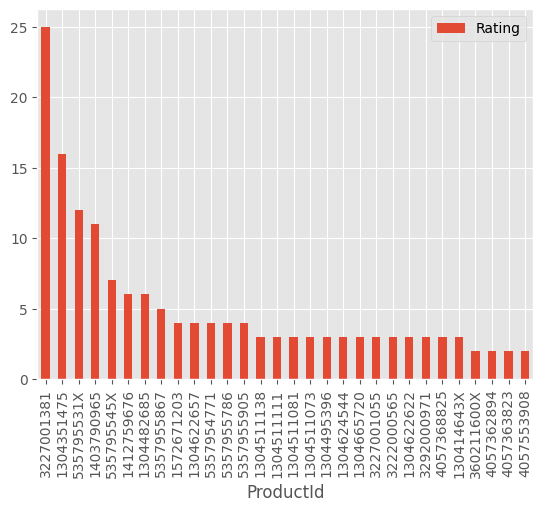

In [7]:
most_popular.head(30).plot(kind = "bar")

Recommendation System - Part II

In [8]:
# Amazon Ratings- subset

amazon_ratings1 = amazon_ratings.head(10000)

In [9]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,5357954771,535795531X,535795545X,5357955743,5357955751,5357955786,5357955832,5357955867,5357955905,5357955948
UserId,,,,,,,,,,,,,,,,,,,,,
A100GYE1W4OXZ8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10REFE1TW3ZVT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A10ZKDOZOSH219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11AT6B3912DCU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A11OEJ4R1PDTLN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:

ratings_utility_matrix.shape

(180, 85)

In [11]:
X = ratings_utility_matrix.T
X.head()

UserId,A100GYE1W4OXZ8,A10REFE1TW3ZVT,A10ZKDOZOSH219,A11AT6B3912DCU,A11OEJ4R1PDTLN,A11Q1HQ84F8POH,A120LZ9VNR3YI0,A13IIHXY0QX4Y4,A15ELVI3I6G1SQ,A15THVWZS6GQZY,...,ATPHIBSTV1NY5,AVCSVH9L0BPIF,AVOGV98AYOFG2,AVQP6PO1NK0IJ,AXVLSEEYTC4Z9,AYHZNXRPOHMO2,AYI1LDJYGG0ZK,AZ4FR14IPKML7,AZLE2XFH3JUNG,AZWRTJPN7NXT
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X1 = X

In [13]:
### Decomposing the Matrix
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(85, 10)

In [14]:
### Correlation Matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(85, 85)

Isolating Product ID # 6117036094 from the Correlation Matrix
Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [16]:
X.index[45]

### Isolating Product ID # 6117036094 from the Correlation Matrix (randomly chosen)

'1304651118'

In [17]:
i = "1304651118"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

45

In [18]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(85,)

Recommending top 10 highly correlated products

In [19]:
Recommend = list(X.index[correlation_product_ID > 0.90])

Recommend.remove(i) 

Recommend[0:9]

['1304139212',
 '130414643X',
 '1304174905',
 '1304511154',
 '1304622452',
 '1304622657',
 '1304651029',
 '1304651088',
 '130465110X']

Recommendation System - Part III

In [20]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#Item to item based recommendation system based on product description

In [26]:
data1 = """
product_uid","product_description"
100001,"Not only do angles make joints stronger, they also provide more consistent, straight corners. Simpson Strong-Tie offers a wide variety of angles in various sizes and thicknesses to handle light-duty jobs or projects where a structural connection is needed. Some can be bent (skewed) to match the project. For outdoor projects or those where moisture is present, use our ZMAX zinc-coated connectors, which provide extra resistance against corrosion (look for a ""Z"" at the end of the model number).Versatile connector for various 90 connections and home repair projectsStronger than angled nailing or screw fastening aloneHelp ensure joints are consistently straight and strongDimensions: 3 in. x 3 in. x 1-1/2 in.Made from 12-Gauge steelGalvanized for extra corrosion resistanceInstall with 10d common nails or #9 x 1-1/2 in. Strong-Drive SD screws"
100002,"BEHR Premium Textured DECKOVER is an innovative solid color coating. It will bring your old, weathered wood or concrete back to life. The advanced 100% acrylic resin formula creates a durable coating for your tired and worn out deck, rejuvenating to a whole new look.  For the best results, be sure to properly prepare the surface using other applicable BEHR products displayed above.California residents: see&nbsp;Proposition 65 informationRevives wood and composite decks, railings, porches and boat docks, also great for concrete pool decks, patios and sidewalks100% acrylic solid color coatingResists cracking and peeling and conceals splinters and cracks up to 1/4 in.Provides a durable, mildew resistant finishCovers up to 75 sq. ft. in 2 coats per gallonCreates a textured, slip-resistant finishFor best results, prepare with the appropriate BEHR product for your wood or concrete surfaceActual paint colors may vary from on-screen and printer representationsColors available to be tinted in most storesOnline Price includes Paint Care fee in the following states: CA, CO, CT, ME, MN, OR, RI, VT"
100003,"Classic architecture meets contemporary design in the Ensemble Curve series, made of solid Vikrell material, blending sleek, clean lines with gentle curves. Corner shelving is perfect for storing bath accessories. Modular design allows it to be moved around corners and through doorways with ease. Curve wall with a smooth, contemporary look, featuring integrated storage shelves.Slightly narrower for tighter spacesDesigned with an 18 in. apronDurable high-gloss finish provides a smooth, shiny surface that is easy to cleanConforms to ANSI Z124.1.2 and CSA B45.1 national consensus standardsCurve wall with a smooth, contemporary look, featuring integrated storage shelves"
100004,"The Grape Solar 265-Watt Polycrystalline PV Solar Panel bonus pack bundles 4 Grape Solar 265-Watt solar panels for extra savings. The Grape Solar 265-Watt Polycrystalline PV Solar Panel uses high efficiency solar cells (approximately 19%) made from quality silicon material for high module conversion efficiency, long term output stability, and reliability. Virtually maintenance free. High transmittance, low iron tempered glass for durability and enhanced impact resistance.Positive power tolerance (0 to +5-Watt)Anti-reflective and anti-soiling surface reduces power loss from dirt and dustOutstanding performance in low-light irradiances environmentsCertified to withstand high wind and snow loads100% electroluminescence inspection ensures modules are defect freePositive and negative leads quipped with MC4 connectors"
100005,"Update your bathroom with the Delta Vero Single-Handle Shower Faucet Trim Kit in Chrome. It has a sleek, modern and minimalistic aesthetic. The MultiChoice universal valve keeps the water temperature within +/-3 degrees Fahrenheit to help prevent scalding.California residents: see&nbsp;Proposition 65 informationIncludes the trim kit only, the rough-in kit (R10000-UNBX) is sold separatelyIncludes the handleMaintains a balanced pressure of hot and cold water even when a valve is turned on or off elsewhere in the systemDue to WaterSense regulations in the state of New York, please confirm your shipping zip code is not restricted from use of items that do not meet WaterSense qualifications"
100006,"Achieving delicious results is almost effortless with this Whirlpool over-the-range microwave hood with convection cooking. With 1.9 cu. ft. capacity, you'll have room to prepare multiple dishes at once. And, you won't have to micro-manage the cooking process thanks to the sensor cooking options. Sensor cooking tracks cooking progress and automatically adjusts cooking time. Convection roasting and baking allows you to bake cakes, bread, cookies and roast meats with ease. Clean-up is simple too with the industry leading CleanRelease non-stick interior surface. It easily releases cooked-on food without the use of harsh chemicals. A damp cloth or sponge is all that is needed to remove cooked-on spills and splashes.California residents: see&nbsp;Proposition 65 informationSpacious 1.9 cu. ft. capacity accommodates dinner plates and casserole dishes with ease1100 watts of cooking power and 10 cooking levels make cooking and reheating a snap400 CFM venting system whisks smoke, steam and odors away from the cooktop to keep your kitchen air clearSingle piece door with built-in touch-activated control console streamlines the exterior for a sleek, modern look and easy cleanupCook with confidence with the Sensor and Programmed cooking cycles and options. Sensor cycles include: Steam/Simmer, AccuPop and Potato for fast prep of family favoritesKids' Menu: it's simple, it's fast. The Kids' Menu is preset with cooking times and power levels for a variety of favorites like pizza and chicken nuggets. Now after school snacks don't have to be an afternoon hassleTimeSavor Plus True Convection cooking uses a 1600-watt element and a fan to circulate heat over, under and around food for fast cooking and even browningIndustry leading CleanRelease non-stick interior requires no special cleaners. A damp cloth or sponge is all that's needed to remove cooked-on spills and splashesRecessed turntable's on/off feature is especially helpful when cooking with plates that are larger than the turntableAutomatic interior incandescent light and large window help you track cooking progress4-speed fan with Auto Vent Fan function. To keep the microwave oven from overheating, the vent fan will automatically turn on at high speed if the temperature from the range or cooktop below the microwave oven gets too hotReplaceable charcoal and dishwasher safe mesh filters takes grease and other impurities out of the air90 hinge. With this innovative hinge design you can install this model next to a wall and still open the door easilyLimited 1-year warrantyConvertible venting. Can be installed as vented or non-vented (recirculating) to fit a variety of installation needsAccuPop cycle senses the perfect pop every time. It adapts cooking time using a sound sensor that measures the time between pops so you don't have to worry about bag size or excessive unpopped kernels. Now you can finally watch the movie, not the microwaveIncluded items: convection rack, SureMist steamer and cooking rack. Included cooking rack lets you microwave on two levels, so you can cook several items at onceClick Here for details on the services included with Delivery & Basic Hook-up and Installation options for this product"
100007,"The Quantum Adjustable 2-Light LED Black Emergency Lighting Unit from Lithonia Lighting provides a minimum of 90 minutes of illumination upon loss of power. Adjust the direction of light using the unique track-and-swivel design of the 2 heads. This unit is ideal for applications requiring attractive equipment with quick installation.Advanced LED technology is dependable and energy efficient2 adjustable heads allow you to direct light where it is neededEngineering-grade thermoplastic housing is impact-resistant, scratch-resistant and corrosion-proofIntegrated LEDs means no bulbs are requiredTypical life of the LEDs is 10 years of maintenance-free operationBlack housing has a compact low-profile designSealed, maintenance-free Ni-cad battery delivers 90 minute capacity to the LEDsDual voltage input capability (120 to 277-volt)Easily installs to wall or ceilingUL damp-location listed"
100008,"The Teks #10 x 1-1/2 in. Zinc-Plated Steel Washer-Head Hex Self-Tapping Drill-Point Screws (90-Pack) helps you fasten metal to metal. The steel screw is ideal for use with metal of a thicker gauge. Drill point and flute remove material and size holes for threads. Install using a standard screw gun (not included) and a 5/16 in. hex drive bit (not included). No pre-drilling required.For metal to metal fasteningIdeal for use with metal of a thicker gaugeUse with HVAC, electrical and door applicationsScrews tap their own headsSteel construction1-1/2 in. longZinc-plated"
100009,"Get the House of Fara 3/4 in. x 3 in. x 8 ft. MDF Fluted Casing to add an elegant look to a room. Its pre-primed surface is free of knots, ready to be painted to match your decor. It cuts and installs easily for a quality look when finished. Its unique detail will add an architectural touch to any room or project.California residents: see&nbsp;Proposition 65 informationMade of primed MDFCan be painted to match your decorResistant to moistureFor interior use96 in. Length"
100010,"Valley View Industries Metal Stakes (4-Pack) are 9 in. galvanized steel stakes for use with all Valley View lawn edgings and brick and paver edgings. These utility stakes can also be used for many other purposes. It is recommended that anchor stakes are used every five feet on designs that have the edging in straight lengths. Where there are curved designs for edgings, additional anchor stakes are recommended at the curve points. Anchor stakes should be staked in at a 45 degree angle. Gloves and eye protection are recommended.Can be used with all valley View lawn edgings and brick/ paver edgingsUtility stakes can be used for many purposesGalvanized steel for strength9 in. lengthPriced competitively yet provides much more value in product"
100011,"Recycler 22 in. Personal Pace Variable Speed Self-Propelled Gas Lawn Mower with Briggs & Stratton Engine. For homeowners seeking a lawn mower with high quality, a user-friendly design, and excellent mulching capability. Toro products are known for Smart Features and Proven Dependability. Count On It.Recycler cutting system - front throw chamber and atomic blade lift, suspend and re-cut clippings into a fine mulch for a healthy, lush lawn22 in. steel deck with atomic bladeBriggs & Stratton 7.25 ft. lbs. gross torque 190cc engine with ready start - no need to prime or chokePersonal pace self-propel system senses and smoothly adjusts to your preferred walking pace3-in-1: mulch, side discharge or bagBag-on-demand - quickly switch from mulching to bagging in seconds by flipping the quick-change leverRear wheel drive self propel provides better traction in all cutting conditions - let the mower do the workWashout port - attach a hose to the mower deck to easily clean the underside of the deck""Quick connect"" bagging system9 cutting positions with 1-4 in. cutting height range to manicure the lawn to your specifications3-year guaranteed-to-start and 2-year full warranty, see retailer for detailsGross torque of this engine was laboratory rated at 2800 rpm per SAE J1940 by the engine manufacturer, as configured to meet safety, emission, and operating requirements, the actual engine torque on this class of mower will be significantly lowerNote: product may vary by storeHome Depot Protection Plan AvailableActual products offered may vary"
100012,"The 96 in. wide Caramel Simple Weave Rollup Bamboo Shade adds a unique casual style to any room. Replace your white window blinds with this versatile natural shade and add warm comforting tones to your decor. This cozy natural shade (also called a bamboo blind or bamboo shade) is composed of natural environmental friendly materials and installs easily with simple hooks. It has a textured caramel finish that complements many hardwood floor and furniture styles, and looks great with a jute or sisal rug. Bamboo flatstick slats are held together by a dark-weave cord, which gently roll up when more sunlight is needed. Textured natural shades are stylishly complementary to coastal, lake, beach, mountain, cottage, or traditional styles of interior decorating. If you plan to use this natural shade outdoors on the porch or deck, you can simply unhook it and bring it indoors easily during the off season if you choose. Shade sizes 60 inch wide and larger roll up for easy lifting. Sizes narrower than 60 in. wide fold up roman style. All sizes install easily with simple hooks.96 in. W x 72 in. LActual Blind Width is 96 in.No deductions are made to this blind - the actual width of this blind is the same as width orderedFor an Inside Mount, fits windows: 96 in. WideFor an Outside mount, order the width of the overall area to be coveredShade provides privacy and the perfect amount of lightShips within 2-3 business daysBamboo slats held by a dark weave cord for warm tones and natural beautyNatural materials may vary slightly in colorRolls up easily when you want to let in additional sunlightInstalls in minutes with the included simple hook hardwareFilters out light for energy-efficient insulationIncludes a 6 in. matching valance, a color coordinated weaving thread and pull cordsDecorating Tip: Add depth and texture to a room by layering textured window shades under curtain panels or cornice boardsDecorating Tip: To make your windows look larger, you can hang this shade outside the molding or up to the ceilingNot sure what size to buy? Click here to download a printable window treatment measuring guide!WARNING: The cords on this product present a potential strangulation hazard. For child safety, consider cordless alternatives or products with inaccessible cords. To access a copy of the warning label, see additional images."
100013,"The InSinkErator SinkTop Switch Single Outlet for InSinkErator Disposers is a stylish alternative to a wall switch. The Switch is air-activated, mounts easily to your sink or countertop and is ideal for island installations.Kit includes satin nickel, chrome and white finish buttons to complement decorCompatible with disposers that have AC below the sinkSuitable for kitchen island installationsIncludes the fittings required to install a single outlet sink top switchAdditional button finishes available include gloss black, biscuit, mocha bronze, oil-rubbed bronze, matte black, and french gold"
100014,"The Rubbermaid 1-Step Folding Plastic Step Stool is the perfect tool when you need extra height in the kitchen, bathroom, office or garage. This folding stool features a solid, one-piece platform top step, making it much stronger and sturdier than other folding stools. Designed with an easy-folding frame, locking top step and a 300 lbs. weight capacity, you'll feel safe and comfortable getting to those hard to reach places. The step stool features non-slip grip on the feet and standing platform.Folds up for easy storage virtually anywhere300 lbs. Load capacityComfortable, solid standing surfaceEasy to use"
100015,"Backyard X-Scapes, Inc. uses the finest bamboo canes from the Anji Mountain located in China to manufacturer their bamboo fencing. Their bamboo fencing goes through a rigorous process to ensure that its customers will be receiving a quality bamboo product. Held together by galvanized steel wires and cut to cap off the top, its construction give consumers the ability to easily install each panel. With additional hardware and supplies, the versatility of these panels can range from gates, to doors, additive shades for roofs, or just as an accent. Why not use this economical friendly resource to help enhance your indoor and/or outdoor appearance.Pest resistantStrong and durableEasy installationTreatment: Fencing is not treated. Always apply a good quality; oil based UV-resistant wood sealant using a brush for best applicationApprox. 1 in. diameter, natural colorHeavy duty galvanized steel wires"
100016,"Make grilling great with this handsome and functional grill gazebo. This grill gazebo is a great gift to anyone who loves to grill, yourself included! Providing shade and protection from harmful UV rays, rain, and debris this grill gazebo will help keep your grill looking great and keep you cool when grilling in the hot summer sun. This grill gazebo comes with a rich brown canopy and black frame. Its 8 foot width means that you can easily fit most size grills beneath, and standing at 8 feet tall even the tallest grill afficionado will fit beneath comfortably! Upgrade your grilling today with the addition of this stunning grill gazebo!Vented canopyBuilt in lattice work is great for holding grill accessories2 built in tile shelvesVersatile design will coordinate easilyDurable, powder coated finishLow maintenance, easy to clean"
100017,"The MD Building Products 36 in. x 36 in. x 1/50 in. Aluminum Cloverleaf Natural Sheet with mill finish is lightweight, strong and rust resistant, making it suitable for a variety of home repair projects. Easy to cut or form, it features a stylish cloverleaf design.Use to repair door or window screens, or add stylish accents to room dividers and cabinet frontsLightweight and sturdy constructionEasy to cut and formRust resistant36 in. x 36 in. x 1/50 in.Mill aluminum finishStylish cloverleaf design"
100018,"This classic plastic sprinkler head that fits all JW82 2 gal. watering cans. Creating a gentle shower for your flowers. Make of plastic.Size: 3.25 in. diameter x 2.75 in. tallThreaded sprinkler head easily attachesColor: whiteMade in the USA"
100019,"The House of Fara 8 Linear ft. primed MDF Overlapping Wainscot Paneling will help you create an 8 linear ft. section of wainscot with chair rail and base moulding. Paint this easy to install primed paneling to complement your decor. Its unique detail will add an architectural touch to any room or project.California residents: see&nbsp;Proposition 65 informationMDF kit includes, 1-piece 8 ft. chairrail, 1-piece 8 ft. base and 16 pieces 32 in. panelsOverlapping wainscotPrimed and ready to be painted to your preferenceEasy to install instructions includedKit includes chair rail and base moulding"
100020,"These unique LED multi-color sticks are sure to add to many locations within your home. The flexibility of being linkable gives you many options, particularly for under cabinet use. Convenient three pack of sticks.Great LED technology5 wattLast for 30,000 hoursCSA and UL approvedHome Depot Protection Plan:"
100021,"Installed in parks and backyards across the globe, Rain Bird's 1800 Series is the #1 selling commercial-grade pop-up sprinkler in the world. Chosen for its reliability, heavy-duty materials and versatility, the 1800 Series offers a broad selection of spray heads for watering shrubs, small lawns and irregularly shaped planting areas. Precision spray heads and nozzles customize your watering system to cover virtually any configuration of lawn or garden - not the sidewalk or driveway. The 1800 Series offers Rain Bird's patented pop-up mechanism for out-of-sight retraction into the lawn when not in operation. A wide choice of nozzles provides full circle, partial circle coverage or infinite pattern adjustment for optimum head-to-head coverage.Spray distance from 8 ft. to 15 ft.Patented close-in watering for most efficient uniform water coverage, resulting in the elimination of dry brown spotsHeavy-duty stainless-steel spring helps ensure flush retractionPop-up sprinkler head features a top-adjustment screw to adjust the spray distance4 in pop-up heightDual spray technology for water efficiencyReduces water waste in windy conditionsNote: Product may vary by store."
100022,"The Samsung 4.2 cu. ft. Front Load Washer with Steam in White is a high-efficiency ENERGY STAR/CEE Tier 3-rated washer. It's equipped with vibration-reduction technology and cleans your toughest stains. It has the capacity to wash a king size comforter, and the stainless steel diamond drum is gentler on clothes than traditional washers, while the Pure Cycle keeps the drum fresh. It offers flexibility with nine cycles and was constructed with premium materials and backed by a 10-year manufacturer warranty on the motor.4.2 cu. ft. DOE stainless steel basket handles bigger loads to let you enjoy more time in the living room instead of the laundry roomStainless steel diamond drum won't rust or damage clothingSanitizing cycle for a cleaner wash ensures the right water temperature and activates the NSF sanitize cycle for 99.9% bacteria-free laundrySteam for stains option is available with the allergen cycle and uses a combination of water temperature and steam to provide the optimal environment for detergent enzymes to work on removing organic stainsFeatures nine cycles: eco wash, normal, heavy duty, permanent press, sanitize, bedding, deep steam, delicates and woolENERGY STAR- and CEE Tier 3-ratedElectronic controls provide easy 1-touch operation and cycle display timePreset cycles allow you to customize your soil and spin levels to provide ideal wash settings for the best resultsAutomatic water level adjustment helps save on energy costsDelay start feature begins operation when it's most convenient for your scheduleVibration-reduction technology with special sensors keep the drum balanced, so you hardly know the washer is onErgonomic front-load design makes loading and unloading simple and easyStackable design provides all-in-1 vertical look to maximize floor spacePedestal shown in product image is not included with purchase and is offered separately during appliance checkoutCan only be used with high-efficiency detergent, typically two tablespoons per loadPlease note: The Home Depot will not hook up your washer with used fill hoses; new fill hoses will be offered during appliance checkout.Click here for details on the services included with Delivery & Basic Hook-up and Installation options for Major Appliances"
100023,"Quikrete 80 lb. Crack-Resistant Concrete is designed to significantly reduce the amount of cracking caused by drying shrinkage. This concrete is ideal for driveways, walkways, floors, sidewalks and patios. The special blend of cement, sand, gravel, fibers and admixtures makes this the perfect concrete for both the professional and novice user who wants to tackle a concrete project.Designed to be used in slab-on-grade applications without the use of wire meshReduces the amount of cracking caused by drying shrinkageOffers superior workabilityProvides superior impact resistance4,000 PSI concrete mixNote: Product may vary by store"
100024,"From Smartphones to refrigerators and everything in between, a gas-free 1250-Watt generator for any situation. Silent, safe, and easy to use indoors or out. Powerful enough to back-up critical appliances - refrigerators and freezers - as well as home health care equipment and power tools. Whether it is for back-up power, camping, tailgating, or light duty construction, the Yeti 1250 generator gets it done.Power lights, tools, refrigerators, freezers and health care equipmentSilent and safe, no noise or fumesPower tools, lights, refrigerators, freezers and health care equipmentSafe to operate indoors; no cords coming from outsideHome Depot Protection Plan:"
100025,"Save your back and make moving easier with this telescopic furniture dolly. Easily adjust the sturdy stainless steel bars to fit larger furniture. The rubber swivel wheels make moving large, heavy objects around corners a breeze and the rear locking wheels ensure your furniture won't roll away.Easy assemblyTelescopic dollyRubber swivel wheels2 locking wheels4 sturdy PVC corner pieces4 sturdy stainless steel polesWeight limit: 220 lbs.Each side extends from 21 in. to 31 in. in length"
100026,"Our 10 ft. x 10 ft. (100 sq. ft.) Yorkstone patio is uniquely designed in a basketweave pattern. Add this beautiful addition to your backyard and get the expensive natural stone look at a fraction of the price. Its an entire 10 ft. x 10 ft. patio on one pallet.Beautiful color blend with a natural stone textureIncludes two different sized patio blocks, 12 in. x 24 in. and 24 in. x 24 in.Printed pattern included in each pallet for an easy installation visualUse to make a basket weave style walkwayPurchase multiple patios and install around your in-ground pool or make a larger outdoor living spaceFor installing around steps or flower-beds just use a wet masonry saw blade to cut and fit"
100027,"The UltraTouch 48 in. x 24 ft. Radiant Barrier is easy to use and install and is made from recycled natural fibers. The radiant barrier provides excellent thermal and acoustical insulation, reflecting up to 97% of radiant energy for excellent savings on heating and cooling costs.Reflects up to 97% of radiant energy, reducing heating and cooling costsEasy to use and installRecycled natural-fiber padding is durableBlanket-type, foil-faced insulation is lightweight and versatileExcellent acoustical performanceClass-A or Class-1 fire rating"
100028,"Reed fencing is a convenient and cost effective way to add texture and a dynamic aesthetic to your home and garden. This fencing is constructed from fresh water reed that grows abundantly along river banks, wetlands, and estuaries. The pre-assembled panels are carefully woven together by vinyl coated wire to ensure durability while remaining seamless. This lightweight material is perfect for easily covering unsightly structures such as old fencing, or it can add a tropical aesthetic to your landscape or pool area. Using reed fencing as a screen can also aid in enhancing privacy for your home and garden. Using renewable resources is an excellent way to aid in preserving our environment, the abundant growth rate of fresh water reed makes it an eco-friendly option.Fresh water reed has a rapid growth rate which makes it an eco-friendly optionEfficiently create a privacy screen for your home and yardProduct measures 1/8 in. Dia x 6 ft. high x 16 ft. longEasily connect additional panels by tying them together with wire"
100029,"Achieving a vintage, time-worn look is simple if you start with the right paint. With Americana DecorChalky Finish paint, creating beautiful home decor and furniture pieces does not require skills or hours of training. Make store-bought pieces or flea market finds look like they came from a European estate sale or a French countryside cottage by using Americana Decor Chalky Finish paint.Ultra-matte sheen that can be quickly customized with different waxes or varnishes that delivers a smooth, soft finish every timeOne coat coverage over most sealed surfaces and base colors - one can covers up to 120 sq. ft.Cleans easily with soap and waterNo need to use primer - reliable adhesion to most surfaces without sanding or using a layer of primerFinal packaging my varyClick Here to learn more about Chalky Finish PaintChalky Finish is also available in the following colorsOnline Price includes Paint Care fee in the following states: CA, CO, CT, MN, OR, RI, VT"
100030,"White Designer Shelf Brackets offer a stylish alternative to typical shelf brackets. They feature a seamless white, vinyl cover that is placed over the bracket bases to hide the hardware and provide a clean, simple look.Weight capacity of 100 lbs. per pair of brackets (when mounted into wall studs)Durable steel constructionSupports shelving to display home decor itemsEasy installation1 bracket and 1 vinyl cover includedNeutral color that blends in with any home decor styleSupports shelves that are 6 to 12 in. deep"
100031,"The Mosser Lee 5 lb. Assorted Polished Stone makes it easy to add an attractive look to container plants by covering the soil with decorative stones. The stones help make magnificent displays for water gardens and fountains and are also excellent for use in terrariums, aquariums, candle projects and many other decorative projects.Dress up indoor and outdoor container plants by covering the soil with polished stonesUse as a vase medium for artificial or live flowersCreate beautiful water-garden and fountain displaysExcellent for terrariums, aquariums, dish gardens, candle displays and a wide array of craft and decorative projectsContains a 5 lb. assortment of polished stonesNote: Product may vary by store."
100032,"The NorskWall NSNW4PK Panel Kit is an innovative modular system which allows users to add space to their garage wall as they need it. NorskWall panels have a patented Slatwall Kwik-Connect feature which allows each panel to quickly lock in place for easy installation. A single person can install NorskWall Panels, quickly adding storage to any space. The 4-piece kit covers 10 sq. ft. of wall space and comes with all of the screws and clips needed for installation. The wall system is compatible with hooks from many manufacturers. Our hooks and accessories are designed to handle heavier load specifications and our shelves, baskets and storage bags have more cubic feet of storage than any other product on the market giving you maximum storage and optimizing your storage space. NorskWall accessories are the most innovative wall storage products on the market.Versatile enough for the garage, basement, laundry room or for commercial display use in a retail store environmentFeatures patented kwik-connect technology for easy installationMade from heavy-duty PVCCovers 10 sq. ft.Quickly add wall storage to any space"
100033,"This easy-to-assemble Decorative Wire Chrome Finish Commercial Shelving Unit from HDX provides storage space for any room and purpose including commercial, industrial and residential use. The 6-tier shelving unit is made of tubular steel and wires coated with a durable chrome finish. All shelf heights are easily adjustable, and the unit can be assembled without any tools. Each shelf holds up to 600 lbs. when evenly distributed and features a total unit weight capacity of 3600 lbs. for optimal use in kitchens, pantries, utility rooms, warehouses and garages.Each shelf supports 600 lbs. when evenly distributed; total unit weight capacity is 3600 lbs.No tools required for easy assemblyTubular steel construction with durable chrome finish offers solid support for a variety of heavy-duty itemsPerfect storage solution for commercial or residential use in any room, office or jobsite6 fully adjustable shelves and legs help stabilize unit on uneven flooringNSF-certified for food storageNote: Product may vary by store."
100034,"Use the Marshalltown Masonry Brush for a wide variety of tasks, including your concrete, cement and masonry needs. The white Tampico fiber bristles are set in a hardwood block.Bristles are made of white Tampico fiberBristles are set in a hardwood blockUse for your concrete, cement and masonry needsUse for a variety of other tasks"
100035,"The FirsTime Champagne Essential wall clock is the perfect traditional timepiece for any wall in your home. It's classically modern while not dominating your home decor. Bring this timeless wall clock home today.Champagne plasticTraditional wall clock styleClassic white dial with Arabic numerals8.5 in. diameter"
100036,"This 12 in. Single Track Bracket from Rubbermaid mounts to single track uprights. It can be moved up or down to suit your unique storage and display needs. Coated with durable epoxy paint, the bracket has a smooth finish and is resistant to chipping or peeling. No tools are needed to attach the bracket; it fastens directly into the upright.No installation tools required; bracket attaches to your wall through a single track uprightDurable epoxy paint coating resists chipping and peelingDesigned to support medium- and light-duty shelvingCan be moved up or down along the upright to best meet your storage or display needs"
100037,"The Husky 9-Pocket Maintenance Pouch has multiple pockets and loops to hold tools and accessories. This durable little pouch will fit comfortably on most 2 in. wide work belts. It's ideal for doing small projects around your home or on a job site.3 main pockets and 6 tool pockets4 interior elastic loops for toolsT-chain tape holderMetal tape measure clipTool snapNote: product may vary by store"
100038,"RIDGID presents the X4 18-Volt 1/2 in. Impact Wrench as a console item. With console-only tools, you have the option to add on to existing kits to create your own. This compact and lightweight cordless tool delivers 325 ft. lbs. of torque to power through the most demanding applications and comes loaded with features such as exclusive grip light technology that engages the LED light simply by holding the tool, innovative Hex Grip for maximum comfort and a Tri-Beam LED for optimum illumination. Backed by RIDGID's lifetime service agreement, you can count on free batteries, free parts and free service for the entire life of your tool.Includes tool only to create your own kit; battery and charger sold separatelyHigh torque output produces 325 ft. lbs. for heavy-duty applicationsDie-cast gear box for increased durability and professional quality1/2 in. dent pin anvil makes it compatible with popular impact rated socketsHex Grip innovative micro-texture for secure grip and maximum user comfortGrip light engages Tri-Beam LED light independently of trigger to illuminate work spaceCordless design enables easy use and portability"
100039,"The Emberglow Vent-Free Gas Stove helps add warmth and ambiance to your home. The stove can heat up to 1,000 sq. ft. of space and features a thermostat control for easy temperature maintenance. The stove's oxygen depletion sensor and automatic shut-off feature help provide safety and its black metal casing can help add an enhanced look to your decor.Automatic thermostat can be set to the desired heat output and the system will automatically maintain that temperatureUnit has dual fuel technology which means it can be operated using natural gas or liquid propane99.9% energy efficient, the vent free design keeps 100% of the heat in your homeHand painted logs give this unit the most realistic look of a natural fireDual burner provides real yellow flames throughout the logsEquipped with a safety oxygen depletion sensor (O.D.S.) and automatic shut-offNo electricity required, great for use as supplemental heat during power outages"
100040,"With an exceptional variety of different styles, Veranda Pro Series vinyl privacy fence kit is perfect for the pro or the do-it-yourselfer. Our vinyl fence offers the perfect combination of high quality and low maintenance you have been looking for. The lightweight kit components make installation fast and easy. The Washington Pro Series Privacy fence panel kit allows you to easily add privacy and curb appeal to your home.Corresponding posts sold separately, use: Line post (Model #73014884), corner post (Model #73014886), end post (Model #73014885)5 in. x 5 in. post tops (Various styles available) attach easiest by using Veranda post top clips (Model #73014080)Vinyl privacy fence assembles in minutes without the use of brackets, fasteners or screwsCoordinating 4 ft. x 4 ft. walk gate (Model # 73014853), 4 ft. x 5 ft. drive gate (Model # 73014854)Tongue and groove boards fit together with no gap in between for true privacy in your yardPro series vinyl privacy fence kits contour to follow the slopes of your yardMade of durable, low maintenance vinylIncludes a transferable limited lifetime warranty"
100041,"The 12in LED Silver Under Cabinet Light (2-pack) offers an energy efficient under cabinet lighting option designed for illuminated kitchen countertops and other work surfaces. The high-quality low-profile housing can be easily hidden under cabinets. The two LED fixtures can be connected together for a total of 24 in. of 3000K (Bright White) illumination.Includes two 12 in. LED fixtures, an integral on/off/dimmer switch and 6-watt power supply plug-in cable, also includes one 12 in. low voltage connector cable to connect over gaps (mounting hardware also included)2 brightness level options (100% of 50%) achieved with the inline on/off/dimmer switch (not compatible with wall dimmers)Memory function of the in-line switch returns the light(s) to last brightness setting (100% or 50%) before unplugging (this feature is for those wishing to bypass dimming and control the kit via outlets connected to a wall on-off switch)6 watt power supply can only accommodate up two 12 in. LED fixtures, additional fixtures cannot be linked to 1 power supplyEasy installation with supplied mounting clips and screwsHome Depot Protection Plan:"
100042,"Update the look of your bathroom with help from the Cadet 3 FloWise No-Tools 2-piece High-Efficiency Round Front Toilet in Bone. The toilet offers a WaterSense-certified design that uses 1.28 GPF to help conserve water. Its EverClean surface helps inhibit the growth of stain- and odor-causing bacteria, mold and mildew.2-piece design features a separate tank and bowlRound front bowl for fit in smaller bathroomsWaterSense certified high-efficiency design uses 1.28 GPF for significant water savingsConstructed with durable vitreous china for cleaner, long-lasting useCadet 3 flushing system with 2-1/8 in. glazed trap way and oversized 3 in. flush valve for a powerful flushIncludes plastic seat and cover with EverClean surface, wax ring for easy installationEverClean surface helps inhibit growth of stain and odor-causing bacteria, mold and mildew5-year warrantyFeatures:Note: product may vary by store"
100043,"Quikrete 50 lb. Non-Shrink Precision Grout is a high strength, non-metallic, non-shrink grout designed for a variety of grouting and anchoring applications. It can be mixed to a plastic, flowable or fluid consistency based upon what the particular needs are on the jobsite.Used for general construction applications, for precision grouting and for keyway and base plate groutingSuitable for grouting pre-cast concrete, steel columns, anchoring applications and heavy equipmentCan be mixed to a plastic, flowable or fluid consistency30-minute set timeReaches strengths up to 14,000 PSIExceeds ASTM C 1107, R-3, and ASTM C 1107Note: Product may vary by store"
100044,"Create a fixture just about anywhere with this Westinghouse Lighting 4 in. x 8 in. White Clip-On Shade. The durable white acrylic dome goes well with most decors and filters soft light. The shade features a small brass finial at the bottom for a pleasant accent. Clip-on shades are a quick and easy way to transform a light bulb into a fixture. Clip a shade onto any A-shape bulb and instantly add a decorative touch--no wiring or tools required. The Westinghouse Lighting White Clip-On Shade measures 4 in. high x 8 in. in diameter.cETL listed for dry locations1-halogen G9 T4 40 watt max, 120-volt - not included 1-halogen GU10 MR16 50w max, 120-volt - not included1-halogen GU10 MR16 50 watt max, 120-volt - not includedPendant glass and shades"
100045,"The Grayson collection from Thomasville brings a customized hardware solution to your kitchen, bath and rooms throughout your home. Shown here in our Oil Rubbed Bronze finish, additional pieces in the Murphy collection are available at homedepot.com for a mix and match approach. Combine knobs and pulls for a truly personalized result on cabinetry and furniture, a quick and affordable way to a new look. Inspired by over a century of design expertise, Thomasville Hardware is crafted of durable, plated zinc, then hand-polished for quality and beauty guaranteed.2-1/2 in. center to center measurement, 4-13/32 in. overall lengthOil rubbed bronze finishFor use on cabinetry and furnitureScrews includedGrayson collection is available in vintage brass, oil rubbed bronze, satin nickel and aged bronze finishesThe Grayson collection also includes 5 in. pull and knob"
100046,"The HDX 6 ft. long Heavy Duty Steel Green Painted T-Post is perfect for supporting varying height and weight fences in farm or residential applications. The post is manufactured from recycled railroad steel and weighs 1.25 lbs. per linear foot. The post is designed in a T configuration, has studs every 2-1/2 inches to help support the fence, and includes a 7 in. long by 3 in. wide steel anchor plate to stabilize the post in the ground.Manufactured from rail steelWeighs 1.25 lbs. per lin. ft., not including the anchor plateCoated with rust-resistant green enamel paint for corrosion protectionShould be driven into the ground a minimum of 12 in.Use Fence Post Driver or sledge hammer to drive post into the groundGalvanized Steel T-Post Clips (sold separately) can be used to attach the fence fabricPerfect for heavier steel fences up to 5 ft. highBuying Guide:"
100047,"This expanded sheet metal can be altered in shape and cut with proper equipment. Commonly used for small metal repair, duct work, patching, and flashing. Expanded angle comes with several different size mesh openings. Available in various sizes and materials.California residents: see&nbsp;Proposition 65 information1-pieceSteel constructionPlain finish24 in. x 12 in."
100048,"Offering the ultimate in versatility, Werner's 13 ft. Aluminum Telescoping Multi-Position Ladder can be set in four different positions to accommodate a range of jobs around the home. Use as a step ladder, stairway ladder, extension ladder or scaffold with two bases. The telescoping design allows you to adjust the height for the job at hand, while ensuring that it stores compactly and is easily transportable. Great for indoor or outdoor use at home or work, it's a must-have for any do-it-yourselfer or pro.Aluminum construction offers lightweight durability12 steps provide easy access to areas around the homeType II, 225 lb. duty rating is ideal for light household applications4-position design converts to step ladder, stairway ladder, extension ladder or scaffold with two basesTelescoping style reduces to compact size for storing and transportingANSI and OSHA compliant for safety"
100049,"Henry 587 Durabrite white elastomeric roof coating is a premium, high solids formula offering better weather protection, solar reflectivity and longevity than economy grade reflective roof coatings. Cured coating forms a permeable membrane which prevents liquid infiltration, but allows moisture vapor to vent, or breathe out of underlying substrate. As an ENERGY STAR partner, Henry has determined that this product meets the ENERGY STAR guidelines for energy efficiency.California residents: see&nbsp;Proposition 65 informationWhite surface reflects sun rays and releases 91% of the sun's heat for energy efficiencyResists ponding waterRecommended for use on metal roofs, weathered, previously-coated white and aluminum roof surfaces, smooth-surface built-up roofs, stucco, masonry parapet walls and more10-year warrantyElastomastic to expand and contract without crackingEnergy Star approved"
100050,"Sit back and relax in comfort and style in these Beverly Patio Dining Armchairs with Bare Cushions (2-Pack) from Hampton Bay. Perfect for a deck, porch, patio or sunroom, the chairs are made with a powder-coated, sturdy and durable rust-resistant, steel-reinforced frame with all-weather resin wicker to help withstand outdoor elements. Inspired by vintage styles, they feature a woven multi-brown wicker finish and include bare seat cushions that can be customized with slipcovers through the Choose Your Own Color option.Part of the Choose Your Own Color program, slipcovers for cushions must be purchased separatelyAll-weather resin wicker crafts a versatile piece for indoor and outdoor useFashioned with a multi-brown wicker finish for a vintage aesthetic in your outdoor living areaNo assembly requiredAll components packed in 1 boxCoordinates with other brown wicker items in the Beverly collection (sold separately)2-year limited frame, fabric and weave warrantyPowder-coated steel frame is durable and rust-resistantMore options available, CLICK HERE to Choose Your Own ColorCustomizable items cannot be returned. Click here to review our return policy for additional information regarding returns<br"
100051,"Soak in the outdoors in the Spring Haven Brown Wicker Patio Lounge Chair from Hampton Bay. It's ideal for your patio, porch or sunroom, as it combines a sturdy rust-resistant steel frame with all-weather resin for season after season of use. It comes with Sky Blue woven olefin cushions. Decorate your space with this chair and other pieces in the Spring Haven Collection for a polished look.Multi-tone brown wicker for a luxurious lookPowder-coated, rust-resistant and reinforced steel frame for durabilityAll-weather resin wicker for withstanding the outdoor elementsSky blue woven olefin fabric cushions included for both comfort and convenienceEasy to assembleWeight capacity of 300 lbs.Matches other items in Spring Haven collection (sold separately) for a full lookMore options available, CLICK HERE to create your own collection"
100052,"Create your own shaded backyard oasis with this beautiful Santiago 10 ft. Octagonal Umbrella. This large cantilever-style umbrella provides optimal shade coverage without the pole getting in the way of conversation or entertaining. The offset pole design is much more versatile than market style umbrellas, allowing you to move the shade where you need it the most. It is just the right size for next to your pool or spa and is great for shading tables of any size. The canopy tilts to provide shade during the rising or setting sun. The durable 8 rib canopy has a single wind vent at the top to prevent inverting on windy days. The sturdy bronze-colored anodized aluminum pole is finished in a bronze color. A smooth-working crank handle easily opens and closes the umbrella (no ropes or pulleys). The large canopy is made of Sunbrella Acrylic fabric. We recommend this cross-arm umbrella base be weighted down with at least 120 lbs. Base weights sold separately or use 4 patio stones. Pole diameter is 2 in., base measures 35.5 in. x 35.5 in. Sunbrella acrylic canopy backed by 5-year warranty; pole and frame are backed by a 1-year warranty.10 ft. octagon umbrella canopy with single wind ventAnodized aluminum poleRich bronze colored frameSunbrella acrylic canopy backed by 5-year warranty1-year warranty on pole and frameSecure cross arm with base weights (sold separately) or patio stones (not included)"
100053,"The 60 in. x 150 ft. 10/10 Remesh provides expansion and contraction reinforcement to add strength when pouring Concrete pads. It is made from ASTM A615 material and covers up to 750 sq. ft. per roll.Provides expansion and contraction reinforcement for concreteUsed when pouring concrete pads for added strengthEasier to use than rebarAstm A615 material750 sq. ft. Per rollNote: Product may vary by store."
100054,"Stanley Doors helps you create an entrance that is an extension of your unique personality. Our products offer lasting, elegant entryways with an emphasis on style, security and, energy efficiency. The Stanley Door Chatham 3/4 Lite 1-Panel Painted Steel Entry Door, adorned with a contemporary decorative glass pattern, exudes elegance and will transform your home's entrance. In addition to the beauty of our doors, you could be sure that once installed, they are simple to maintain and care for and are backed by Stanley's limited lifetime warranty to boot. Stanley Doors are dedicated to manufacturing the highest value products. We are continuously developing and innovating products that will serve you for many years.Polyurethane injected for higher insulation value, strengthening the door from the inside out24-Gauge, hot dipped galvanized steel adds strength to your door and prevents rusting for a lifetimeFinger-jointed kiln dried pine prevents warping and rotting for long-lasting performanceMagnetic weatherstripping seals door from all elements for added protectionStraight-line design provides a modern aestheticInspired by the great architectural traditions of the 20th century, this series offers you a classic look for your home's entranceSTANCOAT state-of-the-art thermo hardened finish for long-lasting protection is virtually maintenance-free and enhances the look of your entrance door, stanley textured coating is your assurance of quality and superior performance whatever climatic conditions existDouble bore allows easy installation of lock and deadbolt of your choiceEnergy efficient and Energy Star certified to save on heatingFrom outside, opens toward the inside of the home with the hinges on the right"
100055,"The Essie faucet in Spot Resist Stainless has a single-handle faucet design for quick and easy water control and includes a convenient soap/lotion dispenser. This faucet features a Spot Resist stainless finish to help resist fingerprints and water spots. The 1-handle lever handles make it easy to adjust the water.Spot resist stainless finish resists fingerprints and water spots for a cleaner looking kitchenFeatures duralock quick connect system for easy installation3 function wand design: aerated stream for everyday cleaning; pause function lets you conveniently stop water flow from the spray head; powerful rinse for heavy-duty cleaningPull-down design offers at-your-fingertips water deliverySoap/lotion dispenser included for fully coordinated convenienceFlexible supply lines with 3/8 in. compression fittings connect directly to supply stopEquipped with the Reflex system for smooth operation, easy movement and secure docking of the pull-down/pullout spray head"
100056,"Bare Ground liquid deicer is the most environmentally friendly deicing product available. Bare Ground can be used before, during or after a snow or ice storm. Safe on all surfaces and around pets and plants. Bare Ground is an All-natural, Non-toxic and Virtually non-corrosive mix of magnesium chloride liquid and a corn co-product. Meets or exceeds the most stringent US environmental specifications.All-naturalEnvironment friendlyVirtually non-corrosiveWater solubleNon-stainingNon-toxicSafe on all surfacesSafe around pets and plantsMeets stringent US environmental specsCan reduce an accumulation of snow if used at the start of a storm-20F low temperature residual spot de-icer"
100057,"EcoTouch insulation is the reinvention of fiberglass insulation from Owens Corning, the industry leader that invented fiberglass insulation. Install our insulation with confidence knowing that over 70 years of innovation and experience has gone in the making of EcoTouch insulation. Unlike traditional fiberglass insulation, Owens Corning EcoTouch insulation contains more than 99% natural ingredients consisting of minerals and plant-based compounds and is verified to be formaldehyde free. Owens Corning EcoTouch insulation is third-party certified to include a minimum of 65% total recycled content for unfaced insulation and 58% for kraft faced insulation. Owens Corning EcoTouch insulation helps to control sound and temperature - keeps your home warm in the winter and cool in the summer.Dimensions: 6-1/4 in. x 15 in. x 93 in., 8 pieces (77.5 sq. ft. / bag)Application: 2 in. x 6 in. walls (Interior / exterior ), floorsCompletely fills the cavity, eliminating gaps and the need for additional handworkProvides thermal performance and helps lower monthly heating / cooling costsEcoTouch insulation helps control sound; add to bedrooms, home office, family room, utility room, kitchen and bathroomCan be combined with FOAMULAR insulating sheathing to achieve greater R-value in exterior wall applicationsBuying guide and insulation calculator:"
100058,"This rechargeable emergency lamp is a must have in every home. It has an AC/DC charger and turns on automatically when the power goes out. It has 40 bright white LED bulbs and a 7 hour run time. It also has an easy carry handle. Don't be in the dark anymore when the power goes out.Turns on automatically when the power goes out7 hour run time on full chargeManual on/off switchFoldable carry handle40 LEDs with output of 300 LumensHome Depot Protection Plan:"
100059,"The rich color of this Textured Ceramic Shaped Planter is covered in a glaze for a polished look. A saucer collects the excess water from built-in drainage holes that protect against overwatering. David Brooks Pottery can tolerate extreme temperatures because they are high-temperature fired stoneware.Our planters feature attached saucers with drain hole for indoor and outdoor useHand-crafted with artisan glazes and colorsGlazed finish for beauty and durabilityDark blue color"
100060,"Add elegance and sophistication to any porch or deck. Porch and Newel post designs capture the elegant style of a turned, painted wood post without the maintenance. Structural newel posts available with flush-mount or thru-deck style for any type of installation scenario.Structural newel posts are available with flush-mount bases that bolt to any surface, or in thru-deck style for attachment to any structural member, thru-deck posts can also be used in masonry applications where core mounting is desiredUnderneath is a load-bearing aluminum column with a capacity of 5,000 lbs.Hurricane lock post bases prevent wind uplift, and eliminate roof jacking during installationEasy to installFlush mount bases are not included"
100061,"Fabback acrylic mirror is a great alternative to traditional glass mirrors. Its superior impact strength and lightweight attributes make this mirror a versatile product that can be used with confidence in many applications around the home. Its shatter resistant properties make it the obvious choice for bath mirrors, home gyms, dressing areas, and even children's play areas. Because its easily fabricated using common tools it can be used in custom applications such as table tops or cut to match a custom frame to create decorative wall mirrors. Regardless of the project, FABBACK acrylic mirror is a great item for use in any area of your home or office.Up to seventeen times greater impact resistance than glass mirror of equal thicknessLightweight - half the weight of glass mirror of the same size and thicknessCan be easily cut using standard plastic cutters and common tools around the homeEasy to care for using only a mild soap and water mixture and damp soft clothSilver mirror colorMirror must be adheared to a ridgid substrate (i.e. 1/2 in. plywood) before mounting to wall"
100062,"Evolution Series garbage disposals are the world's most advanced food garbage disposals . From the powerful induction motors with cutting edge grind technologies to the top-of-the-line sound reducing technologies, the Evolution Select Continuous Feed garbage Disposal delivers exceptional performance- a perfect solution for smaller households or kitchens with restricted cabinet space.Quick Lock sink mount allows for easy installation and disposer replacement5/8 HP Dura-Drive motor provides quiet operation and long life34.6 oz. grind chamber with stainless steel grind components offers durability in a compact sizeMultiGrind technology quickly grinds almost any food wasteSoundSeal technology delivers Quiet performance versus a standard disposer4-year We Come to You In-Home Service Warranty covers repair or replacement by an authorized dealerPower cord is sold separately for installations where a power outlet is present, most installations are direct wired and do not use a power cordMade in the USA and available only at The Home DepotHome Depot Protection Plan:"
100063,"This unique rope light comes in a 10 ft. length. Offers red, green, blue and clear coloring sure to accent any area where rope lighting can be utilized. Also, comes with a remote control for convenience to change colors with ease. Also Linkable with up to six connections.Convenient 3M tape to apply to surfaceRemote control included10 ft. LCSA and UL listedHome Depot Protection Plan:"
100064,"Use TrafficMASTER Allure 6 in. x 36 in. Resilient Vinyl Plank Flooring to add the warm, comfortable style of real wood to your interior living space. This highly durable, water-resistant flooring is great for use in basements, kitchens, bathrooms and high traffic areas. The floating floor installs over most existing surfaces including concrete, wood and vinyl with no floor preparation or adhesives required. It offers a patented GripStrip design for simple installation.Cherry color finish offers the natural look of real wood plank flooring3.8 mm thickness x 6 in. width x 36 in. length4 mil wear layerWater-resistant planks can be used almost anywhere in your homePatented GripStrip design offers easy installation over most existing floorsFor use indoors and in temperature controlled environments onlyEasy to clean and maintainRefer to the installation guide for detailed instructionsAll online orders for this item ship via parcel ground and may arrive in multiple boxes16 planks per case"
100065,"The Glacier Bay 2-Piece High-Efficiency Dual-Flush Complete Elongated Toilet in White delivers powerful 1.1 or 1.6 GPF flush performance and features a WaterSense certified design to help conserve water. This toilet's vitreous china construction offers resistance to acid, abrasion and staining. The all-in-one product contains the toilet bowl, tank and seat along with a wax ring and floor bolts with caps. Limited Lifetime Warranty.2-piece design features a separate tank and bowl16.5 in. chair height elongated bowl meets ADA standardsWaterSense certified product meets high-efficiency toilet (HET) standardsVitreous china resists stains, acid and abrasionDual-flush design provides superior flushing performance of solids and liquids to help prevent clogs1.1 or 1.6 GPFWhite toilet with a chrome-plated, top-mounted flush button complements many bathroom decorsRated #1 dual flush toilet by a leading consumer magazine"
100066,"Cutting Edge Professional Ice Melt is Safer For People, Property and Pets. It provides no-slip protection on steps, sidewalks and driveways. It will not harm concrete when used as directed.Safer ice melt provides safe, no slip protection on steps, sidewalks and driveways making it a great choice for commercial and residential use when used as directedNon-magnesium product formulated without magnesium chloride, safer to handle without protective clothing, it will not dry out or irritate the skin; making it safer for people, property and petsWill not attack concrete, harm property and is pet safe when used as directedHas an extended shelf life: is specially formulated with an anti-caking agent to allow for free-flowing dispersionSpecially coated with green color indicator to ensure cost-effective dispersionNon-tracking: designed to stay where appliedFor commercial and residential use - safer way to melt away gutter ice damsEffective - long lasting ice melt action for added protection and economy"
100067,"The Weyerhaeuser 1/2 in. x 10 ft. Rebar is made from Grade 40 unfinished steel for strength and durability. The rebar is designed with ridges to help concrete grip the bar.Made from Grade 40 unfinished steelCan be used as a forming stake, garden stake, tent stake, sprinkler head stake, connector tie or in concrete reinforcementRidges help concrete grip the barColor coded for easy identificationRusting does not affect performanceCut to a 10 foot lengthNote: Product may vary by store."
100068,"The Rheem Performance Plus 50 Gal. Natural Gas Tall Water Heater comes with a 40,000 BTU/hour environmentally friendly low NOx burner that provides ample hot water for households with three to five people. The push button ignition system ensures safe and easy startup. Its maintenance free combustion air intake system means there are no filters to clean and replace. The self-diagnostic gas control valve monitors system performance. A premium grade anode rod provides long-lasting tank protection. Factory installed temperature and pressure relief valve and 3/4 in. water connections are included with the water heater for easy installation.California residents:due to requirements from air quality management districts in the state of California, please use the map below to confirm whether you live in an area that requires the purchase of ultra low NOx water heatersDue to ultra low NOx requirements from air quality management districts in the state of California, please confirm that your shipping zip code is not restricted from the use of items that do not meet local qualificationsNatural gas water heater costs less to operate than electric modelsDelivers 84 Gal. of hot water in the first hour9 year limited warranty on tank and parts for your convenience2 year in home labor warranty for peace of mind0.62 energy factor makes this one of the most efficient gas water heaters availableMaintenance free - no filter to clean or replacePush button ignition system simplifies the startup processSelf-diagnostic gas valve monitors system performanceDesigned for easy replacement of your existing water heaterRated for installations up to 8,500 ft.Call 1-855-400-2552 before noon for same-day service in most areas, or Visit our Water Heater Installation page for more information.Meets new 2015 NAECA StandardsCalifornia Residents - See if your county requires water heaters that meet Air Quality Management District Ultra low NOx (ULN) requirements:"
100069,"The Shark Rotator Slim-Light Lift-Away is an extremely light lift-away with a portable pod and a shoulder strap to make cleaning in your home easy. Armed with advanced swivel steering for excellent control when maneuvering around furniture, this vacuum has Anti-Allergen Complete Seal Technology + HEPA that traps 99.99% of dust and allergens inside the vacuum. Combined with 2 foam filters, this dust containment system helps keep dust and allergy-causing agents from escaping back into the air. The deluxe motorized brush roll can be turned on or off, providing powerful performance on both carpets and bare floors. The vacuum includes a crevice tool, wide upholstery tool, dusting brush, shoulder strap and accessory bag for convenient storage. It also includes a Dust-Away attachment that enhances bare floor cleaning. Based on ASTM F1977 of particles between 0.3 and 0.5 microns.California residents: see&nbsp;Proposition 65 informationNever Loses Suction technology2-in-1 Lift-Away technology with shoulder strapPremium floor nozzle with headlightsAnti-Allergen Complete Seal technologyDust-away hard-floor attachment for powerful bare floor cleaning"
100070,"Light your counters with the GE 18 in. Direct Wire under cabinet LED fixture. This high powered fixture mounts under any cabinet, bathing your task area in a bright warm light suitable for any task, and can be switched to a low level for accent lighting/nightlight. GE LED Light fixtures are energy efficient and cool to the touch, lowering your energy consumption when compared to Halogen and Fluorescent under cabinet fixtures.Contains 6 non-replaceable LEDs639 LumensDirect wireHigh and low light settingsHome Depot Protection Plan:"
100071,"Brighten any room in your home with this Steves & Sons patio door. This Energy Star qualified 1-3/4 in. door is pre-assembled in a fully weather-stripped frame for easy installation. The door is assembled with brushed nickel hinges and adjustable mill finish sill. The patio door and frame are primed and ready to finish in a color of your choice.Top quality galvanized steel with polystyrene core construction provides energy efficiency and securityInterlocking stile edge provides structural rigidityHigh performance bronze weather stripping and adjustable mill sill provides a tight seal against draftsAssembled with lowE tempered glass and external 15-lite grille for energy efficiencyPrimary door is doubled bored for lockset with deadbolt and heavy duty astragal on secondary door for added securityPrimed smooth surface ready for paintingPrehung 4-9/16 in. primed frame with retrofit doors for easy installation when replacing existing sliding patio doorRequires rough opening of 60 in. x 80 in., actual unit size 4-9/16 in. x 59 in. x 79-1/2 in.From the outside primary door opens toward the inside of the home with the hinges on the leftEnergy Star compliantBrickmold and interior trim sold separately"
100072,"Recommended for durable surfaces such as wood, tile and carpet. Tape is easily removable within a 3-day period.  With a medium adhesive this tape is perfect for multiple surfaces.14-day removalMedium adhesionMulti-surface useMade in the USAClick here to see Home Depot's tape buying guideClick here to find out which painting tape is right for your project"
100073,"The Husky 17 in. Open Tool Tote with Rotating Handle offers an Open Top with a Rotating Handle allowing for full access to tools stored inside. This item also offers reinforced pockets for durability through years of use. The Husky 17 in. Open Tool Tote with Rotating Handle is the perfect fit for anyone in need of open top storage and long-lasting durability.600 denier water-resistant material19 reinforced pocketsRotating handle17 in. L x 8 in. W x 10 in. H3 year limited warrantyNote: product may vary by store"
100074,"Soho Thames Beige 4 ft. x 6 ft. Area Rug is a fun and functional collection of hip designs. It is as funky and cheeky as the neighborhood that bears its name. Soho is great finish and cool designs.100% WoolCotton backingHand Crafted in IndiaSoho is painstakingly and enthusiastically finishVacuum regularly and spot clean; do not dry cleanYarn dyed for vibrant, lasting colorPlease Note: The digital images and product dimensions on our website are as accurate as possible. Due to differences in computer monitors, some rug colors may vary slightly. Lengths and widths may vary from the published dimensions. We do our best to provide you with an exact measurement, but please be advised that some variation exists. Patterns may vary slightly according to shape and size selected."
100075,"Relax the look of any room with the calm and comforting Driftwood Flatweave Bamboo Roman Shade. Environmentally friendly, semi-private textured natural shades (also called bamboo blinds, bamboo shades, or woven woods) stylishly filter light and protect your furniture from fading. The rich wood tones of natural shades are complimentary to jute and sisal rugs as well as many hardwood floor and furniture finishes. Natural shades are textured window blinds that are available in many different colors and styles. They are popular window treatments for coastal and beach properties, lakeside or country cottages, and traditional or metropolitan homes. For additional privacy or neutral backing, you can attach a fabric privacy liner to the back side of natural shades. Another option for additional privacy is to outside mount natural shades, then inside mount an inexpensive white black out roller blind. Fabric privacy liners and black out roller blinds both can be purchased on homedepot.com.23 in. W x 72 in. LActual blind width size is 22.5 in.NOTE: This blind is 0.5 in. (1.27 cm) narrower than the order size (or the size shown on the box)For an inside mount, fits windows 23 in. wideFor an outside mount, order 0.5 in. wider than the overall area to be covered6 in. matching valance included1/4 in. flatstick driftwood slats alternate with 1/8 in. natural brown bamboo matchstick that provides light filtering and semi-private window treatment to your home, cottage, lake or beach houseReal natural bamboo slats are easy to maintainSemi- private shades provide light and privacy control for windowsDriftwood natural bamboo slats alternate in a coastal pattern woven wood weave that will compliment any roomSemi-private roman shade have a lift and fold system that opens and closes easily for some privacy and light control lightDecorative tassel matches perfect to the style of the shadeFinished bottom railDecorative designer tips included on packageEasy installationInterior roman shadeDesigner Tips: Add additional depth and texture to a room by layering natural shades under curtain panels or cornice boards; To make a window look larger, outside mount the shades on the window molding, or up to the ceilingNot sure what size to buy? Click here to download a printable window treatment measuring guide!WARNING: The cords on this product present a potential strangulation hazard. For child safety, consider cordless alternatives or products with inaccessible cords. To access a copy of the warning label, see additional images."
100076,"Enhance your outdoor area with the Universal Forest Products, Inc. 4 in. x 4 in. x 6 ft. Pressure-Treated Pine 2-Hole Split Rail Corner Post. Constructed of solid wood for lasting durability, the post is pressure treated to help withstand a variety of weather conditions and other elements of nature.California residents: see&nbsp;Proposition 65 informationSolid pineNatural wood; brown and tanCan be painted or stained2-hole designPressure treatedFor residential useNote: Product may vary by store"
100077,"Designed to join 3 lengths of pipe in a 90 degree branch connection, the Mueller Global 3/4 in. black iron tee is for use in gas, oil, and air applications. This tee is designed to withstand up to 500 PSI of pressure. Each tee has the Mueller brand cast into the body, a sign of assured 100% quality inspection and testing.Forms a 90-degree branch connection of 3 pipesFor use in potable gas, oil, and air applicationsMalleable iron class 150 lb.Relative softness of metal helps provide a sure sealFemale threads comply with ansi b 1.20.1Meet astm and asme standardsNote: Product may vary by store."
100078,"Safavieh's Courtyard collection was created for today's indoor/outdoor lifestyle.These beautiful but practical rugs take outdoor decorating to the next level with new designs in fashion-forward colors, and patterns from classic to contemporary. Made with enhanced material for extra durability, Courtyard rugs are pre-coordinated to work together in related spaces inside or outside the home. Safavieh developed a special sisal weave that achieves intricate designs that are so easy to maintain, you simply clean your rug with a garden hose.100% PolypropyleneNo backing, rug pad recommended to avoid shifting and slidingPower Loomed in TurkeyWater resistant making it perfect for outdoor useVacuum regularly and spot clean; for hard-to-remove stains, professional rug cleaning is recommendedFor an instant decorating makeover, this area rug is one of the easiest and most fashionable ways to refresh a room with character and stylePlease Note: The digital images and product dimensions on our website are as accurate as possible. Due to differences in computer monitors, some rug colors may vary slightly. Lengths and widths may vary from the published dimensions. We do our best to provide you with an exact measurement, but please be advised that some variation exists. Patterns may vary slightly according to shape and size selected.60 day manufacturer warranty, for warranty information on this product, please call our Internet Customer Service Center at 1-800-435-4654"
100079,"The Frigidaire 18 cu. ft. Top Freezer has 2 Full-Width Glass Shelves and 2 Humidity Control Crisper Drawers for storing fruits and vegetables. Equipped with bright lighting to keep contents clearly visible. Freezer has a half width shelf for flexible storage options as well as two full-width door racks.Optional icemaker eliminates the need to fill ice trays and ensures you have a steady supply of ice on handSingle knob control inside the refrigerator for easy temperature management2 Full-width sliding glass shelves in the fresh food compartment help you to stay organized2 Humidity-Controlled Crisper Drawers keep your fruits and vegetables freshDoor storage includes 3 Full-width racks that give you room for larger items like a gallon of milkLarge 14.1 cu. ft. Fresh Food Capacity has the space to keep foods organized while 3.98 cu. ft. Freezer Capacity gives you room for storing all your frozen foods2 Full-width freezer door racks and 1 half-width shelf gives you more usable space and better organizationDairy compartment with a clear dairy door is perfect for storing butter and cheesesColor coordinated cabinet, door, and handles give you a refined lookBright lighting makes it easy to see what's insideA two-door refrigerator model that features the freezer on top and the refrigerator on the bottomClick Here for details on the services included with Delivery & Basic Hook-up and Installation options for Major Appliances"
100080,"The Brinly 24 in. x 36 in. Heavy-Duty Tow-Behind Poly Lawn Roller easily hooks behind your tractor for towing. The drum features polyethylene construction to help resist dents and rust, and the end caps are rounded to help prevent lawn damage when turning.Capacity of up to 690 lb.Easily hooks behind your tractor for towingDrum features polyethylene construction to help resist dents and rustEnd caps are rounded to help prevent lawn damage when turningLarge opening for easy filling and emptyingLightweight, easy-to-store design"
100081,"Made of solid Vikrell material, the Accord series offers a sleek, seamless appearance, the four piece modular design with caukless seams allows for easy installation. Ample, out of the way shelving, provides plenty storage and bathing room.15 in. from floor to top of apronMade from solid Vikrell material for strength, durability, and lasting beautyModular design allows for easy installation during any phase of constructionHigh-gloss finish provides a smooth, shiny surface that is easy to cleanFour integrated and recessed corner shelves for generous storage spaceNo caulking required in the seamsConforms to ANSI Z124.1.2 and CSA B45.1 National Consensus StandardsBath only installation not recommended. Install with 71244100 wallset"
100082,"What a wonderfully crafted slate top and metal shelf baker's rack that fits into any kitchen, nook, or patio in the home.  All the metal is finished in a rich powder coated black which gives the product a distinct look. The nicely sculpted metal top adds to the beauty of this unit. The 3 metal slotted shelves are perfect for that additional storage that is always needed.Constructed of metal and stoneLarge slate natural rustic top adds a certain eleganceClean with a dry non abrasive clothReady to assemble"
100083,"Shape Products Thick & Strong Area Well Covers are made extra thick to give your well extra protection from weather and animals. This cover has a sloped design which helps to shed water. Keep your well free of leaves, debris, animals, and the elements while allowing light into your basement. This cover is made for 37 in. x 16 in. half-circle area wells and is recommended for wells 36-37 in. wide x 15-16 in. deep for a close fit.Keeps your well free of leaves, debris, animals, rain, snow, and cold: helps save energySloped design: Helps shed water away from your house and wellIncludes easy to install spring-clip hardware: Installs in 10 minutes5-Year warranty"
100084,"Unique gel paint lets you create glow in the dark projects that wash away with soap and water. Glo Away paint is safe for fabric, wood, glass, plastic and ceramics. Paint can be used to do artwork and can be added to other projects that you want to glow.Certified AP non toxicPaint is perfect for decorating kids rooms and ceilingsReactivates when exposed to lightCan be used with stencils to create unique and exciting projects"
100085,"Bali Cut-to-Size 12 mil Vinyl Roller Shades effectively block the light while providing privacy with heavy, 4 ply vinyl. Great for bedrooms and media rooms, the durable, blackout vinyl shades features cordless control for safe, easy operation. A great solution for windows of many sizes, they can be easily trimmed to your desired width. Maintain the smooth, bright look of the shades by occasionally wiping them with a damp cloth. Available in classic white or cream.36.5 in. W x 78 in. LActual Blind Width is 36.5 in.No deductions are made to this blind - the actual width of this blind is the same as width orderedFor an Inside Mount, fits windows: 36.5 in. WideFor an Outside Mount, order the width of the overall area to be coveredCordless roller shades are ideal for homes with children or petsAvailable in classic white or cream colorTo correctly measure and mount your shades (either inside or outside the window frame) please consult the installation guideIf mounting the blind on the outside of the window opening (outside mount) you can order the next larger size, or a couple of sizes larger, to get additional overlap on the window if desiredNon-standard widths can be ordered online or Bali Cut-to-Size in the store (Note: Availability may vary by store)For directions on adjusting roller tension, please click on the installation guideNo valance includedMounting brackets are sold separatelyNot sure what size to buy? Click here to download a printable window treatment measuring guide!"
100086,"The Rust-Oleum EpoxyShield 2 gal. Tan High-Gloss 2-Part Epoxy Garage Floor Coating Kit is easy to apply with a brush to garage concrete surfaces. The epoxy 2-part, water-based formula provides ideal protection and the high gloss sheen in tan offers a handsome appearance. Decorative chips are included for an appealing look.California residents: see&nbsp;Proposition 65 informationEasy to apply with a brush to garage concrete surfacesEpoxy 2-part, water-based formula provides ideal protectionHigh-gloss sheen in tan offers a handsome appearanceDecorative chips are included for an appealing lookFinish up to 500 sq. ft. or a 2-1/2 car garage for complete coverageFormulated to withstand wear and abrasionsResists damage by gasoline, anti-freeze, motor oil, salt and hot tiresEasy to clean with soap and waterActual paint colors may vary from on-screen and printer representations"
100087,"YuTrax best-selling model, the portable TX107 aluminum folding arch ramp features a compact folding design that is perfect for use on short bed trucks. It is built with fully-welded construction for optimum durability to ensure you get your ATV, UTV or lawn and garden equipment to its destination safely.Dimensions: 12 in. x 89 in. single ramp open 12 in. x 44.5 in. single ramp foldedLightweight, fully-welded aluminum constructionRamp's extruded rectangular side rails resist bending; the taller rectangular cross section supports more weightExclusive tread gripping mesh surface makes loading lawn tractors and other vehicles with low clearance quick and easyHeavy-duty hinges and joints are welded, not riveted, for added peace of mindRubber coated tabs protect your tailgate from scratchesAdjustable straps or chains secure ramps in placeCapacity: 750 lbs. single ramp 1500 lbs. pair"
100088,"The Werner Compact Aluminum Attic Ladder is lightweight and easy to open and close with the included assist pole. Its compact design installs into small openings for access to untapped storage space, ideal for hallways, closets and other tight spaces. With a 250 lb. duty rating, the durable aluminum ladder features non-marring feet to protect any flooring type. The slip-resistant steps and oversized hand rail offer additional safety and comfort while climbing, making it easy to access small openings.Aluminum construction offers lightweight durability250 lb. duty rating ideal for most household tasksTelescoping design gives you quick, hassle-free access to small attic openings anywhereIdeal for hallways, closets and other tight spacesAssist pole allows for easy opening and closingHardware for door included (door sold separately)ANSI and OSHA compliant for safetyNote about attic clearance: minimum clearance required behind opening: 44 in.; minimum clearance required above attic opening: 28 in.; to mount assist arm on attic floor, 3/4 in. flooring 27 in. deep (minimum), the full width of opening, must be present in atticThe #1 brand in professional climbing equipment:"
100089,"This heavy duty Melnor Adjustable Rear Trigger Nozzle features an Adjustable tip that sprays from mist to jet so you can tackle a variety of watering jobs. The nozzle's trigger lock feature allows for continuous spraying. Adjustable tip features a mist or jet spray for a variety of watering jobs.Assembled dimension: 1.38 in. W x 3.5 in. D x 5.38 in. HHeavy duty zinc body construction with metal nozzle for durabilityInsulated rubber handleTrigger lockSqueeze handle for easy control of water flow"
100090,"Say you need just a little extra cooling, but you want a window unit that really works. Maybe one with 5,000 BTUs, dual cooling speeds and a 2-way air direction function that cools up to 150 sq. ft. Well, we've got it right here. Not a ton of bells and whistles. Just a really great air conditioner. LG window air conditioners come with multiple innovative features aimed at making your life cooler. Help keep your room cool with the LG Electronics 5,000 BTU Window Air Conditioner (LW5015). The air conditioner can cool a room of up to 150 sq. ft. and features adjustable temperature settings for a customized cool. The air conditioners 2-way air deflect.Estimated cooling area (150 sq. ft.) for temperature controlEasy Installation Kit Included. Get comfortable with the greatest of ease. This window unit comes with our easy to use installation kit so you can set up your air conditioner with ease2-speeds: 2 cooling and fan speeds with auto cool keep your cool under control three powerful cooling and fan speeds allow you to control the temperature of your room at your pace2-way air deflection helps spread the cool air throughout the roomWashable filter helps save money on replacementsEnergy efficiency rating of 11.2UL listed for safetyDesigned for installation in a window that measures 21 - 35 in. W and at least 12 in. HAutomatically restarts after a power failure there are storms, high winds and extreme heat that can lead to power outages keep yourself covered with AutoRestart, which automatically turns the unit back on when power is restoredRemoves up to 1.5 Pint of moisture from the air in a hour to control humidityProduct (W x H x D): 17.31 in. x 11.13 in. x 14.38 in.Voltage/60 Hz: 115Top Down ChassisHome Depot Protection Plan:"
100091,"The WAYNE1/6 HP Submersible Utility Pump is ideal for draining flooded basements, emptying water-filled boats and removing water from sinks, tubs and flat roofs. Its oil-filled, thermally protected motor helps prevent overheating and can pump up to 950 GPH at 0 ft. of lift. The 3/4 in. discharge adapter connects to standard garden hose and its bottom-suction design removes water down to within 1/8 in. of the surface.Pumps up to 950 GPH at 0 ft. of liftOil-filled, thermally protected motor helps prevents overheatingIdeal for draining flooded basements, emptying water-filled boats and removing water from sinks, tubs and flat roofsTop center 3/4 in. discharge provides balanced installation3/4 in. discharge adapter connects to standard garden hoseBottom suction design removes water down to within 1/8 in. of surfaceEasy-access handle for portabilityUL listedHome Depot Protection Plan:"
100092,"Restore 4X Deck Coat is a water based problem solving coating, formulated to make light repairs and is 4X thicker than ordinary paint. It beautifies and protects old previously coated wood, bare wood, broom swept concrete and most synthetic decking with proper surface preparation. 4X is ideal for wood and composite decking, concrete docks and more.Superior coverageLong lasting protectionConceals hairline cracksOutlasts typical deck stainsBarefoot friendlyFor horizontal and vertical surfacesCovers 80 sq. ft., two coats requiredOnline Price includes Paint Care fee in the following states: CA, CO, CT, MN, OR, RI, VT"
100093,"The M18 FUEL Hole Hawg 1/2 in. Right Angle Drill from Milwaukee drills faster than the original corded Hole Hawg, delivers over 150 7/8 in. holes per charge and is over 30% lighter weight than its corded predecessor. Optimized for electricians, the Hole Hawg delivers game-changing productivity for professionals drilling with augers up to 1-1/4 in. and self-feed bits up to 2 in. Featuring the POWERSTATE Brushless Motor, it delivers better performance than corded drills, especially under heavy load. This Hole Hawg is also designed with REDLINK PLUS Intelligence, preventing damage to the tool and battery caused by overloading or overheating. The tool uses REDLITHIUM XC 4.0 batteries (sold separately) that provide up to twice the run time and recharges of standard lithium, operate down to 0 F/-18 C and feature a battery fuel gauge to display the remaining charge.Includes 2707-20 right angle drill and chuck keyPOWERSTATE Brushless Motor provides constant power under heavy load to complete holes faster than corded drillsREDLINK PLUS Intelligence ensures optimal performance and overload protection to prevent damage to tool or battery during heavy applicationsAll-metal keyed chuck offers maximum durability and bit retentionOnboard chuck key holder for added convenienceCompatible chargers: M18/M12 multi-voltage (48-59-1812), M18 AC/DC (2710-20)Compatible batteries: compact 1.5 Ah (48-11-1815), compact 2 Ah (48-11-1820), extra capacity 3 Ah (48-11-1828), extended capacity 4 Ah (48-11-1840)5-year warranty on toolHome Depot Protection Plan:"
100094,"The Ariens Deluxe Two-Stage 28 in. Gas Snow Blower offers powerful snow-clearing action. Snow removal is even easier with the new Auto-Turn steering feature. There is no more straining or fumbling with triggers to turn your Sno-Thro around. Auto-Turn is just that - Automatic. The Sno-Thro will turn when and where you want it to, with ultimate traction. It features a 254 cc Ariens AX engine. With a 28 in. clearance width and a 21 in. intake height, this rust-resistant snow blower features an electric ignition button for quick starts, and 205-degree chute rotation with remote deflector control to easily change the height and direction of snow being thrown. The Deluxe Sno-Thro series machines are the most popular and versatile choice to clear walkways and driveways of all sizes to any home or business.254 cc Ariens AX engine offers powerful snow-clearing actionThe new auto-turn steering offers maximum control, precise turning and smooth operation all with no levers or triggers28 in. clearance width and 21 in. intake height make quick work of clearing driveways and patios in minimal passes6 Forward speeds and 2 reverse speeds let you adjust snow throwing to accommodate different conditions14 in. serrated auger handles compacted snow and ice and aggressively pulls it into the blower housing14 in. 3-blade impeller provides the driving force necessary to powerfully discharge the snowHeavy-duty cast iron gear case with alloy steel gears and L-3 synthetic severe-duty gear oil provides continuous reliability and a longer gear life with a 5-year warrantyDual-handle interlock system conveniently frees one hand to allow chute and speed adjustments while maintaining operator safetyExclusive dual belt auger drive system propels snow up and out of the chute powerfully and continually, providing sustained power and longer belt life with minimal to no maintenance or adjustments205-degree, 2.5x ice drill chute with a remote deflector accurately discharges snow up to 50 ft. for enhanced clearing120-Volt electric push-button start provides a quick and easy startLarge, in-dash halogen headlight helps provide extended snow removal time and added safetyHeavy-duty, reversible skid shoes adjust the height of the blower housing to help clear uneven surfacesRust-resistant exterior helps ensure long-term useIncludes a 3 year limited consumer warrantyIn most shipping areas, Ariens offers free white glove delivery service, Sno-Thro will be shipped to your local Ariens authorized servicing dealer, who will complete 100% assembly of unit and perform multi-point inspection prior to home delivery, multi-point inspection includes, operators manual confirmation, set tire pressure, check fluid levels, and file warranty registration informationDisclaimer in qualifying area only - If an Ariens authorized dealer is not in your shipping area, the Sno-Thro will ship mostly assembled, directly to you via regular truck delivery, simple set-up instructions will be included with unit, to confirm White Glove Delivery availability prior to purchasing, call 888-927-4367 option #2Home Depot Protection Plan:"
100095,"Your 5.0 cu. ft. Adora Gas Range has two extra-large power boil burners so you get twice the high heat cooking power. Never worry about burning your dishes again with the Gas Convection Oven, which circulates heat for high quality results. Be able to clean your oven fast and efficient with the self-cleaning capabilities. GE appliances provide up-to-date technology and exceptional quality to simplify the way you live. With a timeless appearance, this family of appliances is ideal for your family. And, coming from one of the most trusted names in America, you know that this entire selection of appliances is as advanced as it is practical.California residents: see&nbsp;Proposition 65 information5.0 cu. ft. capacity allows you to cook multiple dishes at once, perfect for holiday gatherings and every day in between5 burner range includes two extra-large power boil burners so you get twice the high heat cooking powerLarge oval center burner is ideal for griddle or odd size cookwareGas convection oven circulates heat for high quality resultsBuilt in storage drawer provides extra space to store your pots and pans when they are not in useElectronic keypads on the control panel make it easy to operate with just a touchClean the oven the way you want it cleaned with the self-clean optionLarge oven window provides better visibility of the oven interior, allowing you to monitor cooking progress without opening the door, keeping oven temperatures steady and undisturbedA large continuous cooking surface gives you extra room for pots and pans of all sizes and lets cookware move easily from burner to burnerTwo oven racks can be configured in 6 different positions to accommodate a variety of baking needsEasily and safely clean grates in the dishwasher with these dishwasher safe gratesCook up to six grilled cheeses at once on the industry's largest integrated griddleComes with a 1 year limited manufacturer's warrantyClick Here for details on the services included with Delivery & Basic Hook-up and Installation options for this product"
100096,"The Woodgrain Millwork 1/2 in. x 3-1/4 in. LWM 623 Primed MDF base is the perfect addition to dress up any room.  The Woodgrain Millwork Primed MDF LWM 623 base is used cover any imperfections where floor and wall meet.  Base Moulding can also be used as starter point for a more elaborate built up base boards.   Combing other mouldings with this base can create looks that range from classic to elegant.California residents: see&nbsp;Proposition 65 informationSmooth, consistent preprimed surface is free from knots and is ready to finishCan be painted with any high quality latex or oil based paintA great foundation for any room, can be paired with any style of casingA classic pattern that works with any styleInstalls with common woodworking toolsFor interior use only"
100097,"Set up the Woodbury 7-Piece Dining Set from Hampton Bay on your patio or deck and create a comfortable atmosphere for outdoor dining and conversations. Richly woven, cottage-style bucket chairs and a picnic-inspired, faux wood rectangular dining table capture the true feel of country design. This set includes six dining chairs with lumbar pillows and a rectangular dining table. The framing is crafted with durable, rust-resistant, powder-coated steel and aluminum wrapped with a traditional, wood-toned, hand-woven weave. Designed for comfort, the seat cushions come in soft, all-weather fabric that is stain, mildew and fade resistant for years of outdoor enjoyment.Rust-resistant aluminum on exposed frame areas and steel frame under weave are built to lastWeather-resistant fabric allows you to simply slick water and moisture awayPowder-coated frame prevents scratchingDragonfruit colored fabric complements the rich, dark brown frame and brightens any patioAll-weather aluminum slat top table offers ample space for entertainingQuick and easy assembly using included hardware and toolsStationary armless dining chairs offer comfortable seatingEasy to clean with mild soap and water, then air dryShips in two boxes"
100098,"Sturdy, durable and easy-to-use, the Gardener's Blue Ribbon 16 in. Plastic Rolling Plant Caddy makes it easy to move heavy potted plants. The caddy features 4 heavy-duty castors to provide support while protecting your carpets, rugs and floors. The built-in reservoir helps keep your plants out of the water. The caddy comes Fully assembled and ready-to-use.Clear plastic construction for durability200 lb. weight capacity makes it easy to move heavy potted plants1-1/2 in. lip helps prevent pot slippage and tippingFor indoor and outdoor use4 heavy-duty castors with steel stems provide support while protecting your carpets, rugs and floorsBuilt-in water reservoir catches excess water to protect your floors and carpets and keeps your plants out of the waterFully assembled and ready-to-useNote: product may vary by store"
100099,"Driving screws to consistent, repeatable depths can be a real challenge. The versatile, multi-functional Adjustable Depth Stop Screw Guide makes this task easy and fast for woodworking projects, drywall installation and general construction projects. Get professional results with quality-made, high performance accessories from Montana Brand.3-in-1 functions: magnetic bit holder; adjustable depth stop screw setter; and screw guideAdjustable guide sleeve for driving screws to consistent repeatable depthsGuide sleeve prevents screw wobble or disengaging from the bit, magnetic screwdriver bit tip for fastener retentionNon-marking depth stop cap protects material surface1/4 in. quick change compatible and impact hex shank, made in the USA"
100100,"The EasyFlex Aluminum Landscape Edging by Dimex is the perfect choice for homeowners and contractors alike, offering professional grade quality. Its name speaks for itself with easy installation; simply slide the ends of the material together with an approximate 4 in. overlap, insert the provided spikes at a 45 angle and enjoy a permanent and virtually maintenance-free solution to the infamous curb appeal dilemma.  EasyFlex will not rust, rot or become brittle like other edgings, and straight runs or curves can be created with ease. It is made from recycled material, is non-toxic, has excellent corrosion resistance and is all-around environmentally friendly. This set is available in a variety of colors including silver, black, brown, bronze and green. Applications include landscape beds, tree rings, walkways and pathways, brick or stone patios, gardens, drip edges and more.Easy sliding installationWill not rust, rot, crack or become brittleCreates straight runs or curves with easePermanent and virtually maintenance freeMade from recycled materialLimited lifetime warranty against manufacturers defectsApplications include landscape beds, tree rings, walkways and pathways, brick or stone patio gardens, drip edgesEasy-to-install aluminum lawn edging and landscape border"
100101,"PG-21 Lacquer-Resistant Performance Grade Masking Tape is a performance grade painter's masking tape with lacquer resistance. Recommended for high temperature applications. Clean removal from a variety of surfaces. It has a smooth texture, tear-resistant backing for long paint lines and 1-piece removal. Not recommended for outdoor useRecomended for high temperature applicationsSmooth texture, tear-resistent backingClean removal from a variety of surfacesLacquer resistanceNot recommended for outdoor use"
100102,"The Teks #12 x 1-1/2 in. Zinc-Plated Steel Hex-Head Self-Tapping Drill-Point Screws (80-Pack) provide secure metal-to-metal fastening without the need to pre-drill. They are ideal for fastening thicker gauge (20 - 12 Gauge) metal-to-metal in applications such as heating, ventilation and air conditioning.Provide secure metal-to-metal fastening without the need to pre-drillEngineered drill point and flute (pilot section) remove material efficiently and size a hole for threadsScrews tap their own threadsFor fastening thicker gauge (20 - 12-gauge) metal-to-metal in applications such as heating, ventilation and air conditioningFasten electrical (attaching accessories to steel framing), as well as overhead steel doors, hinges and latchesSteel constructionZinc-platedNo pre-drilling necessaryInstalls with a standard screw gun and a 5/16 in. hex-drive bit (not included)"
100103,"The Commercial Electric 3-Piece Electrician's Tool Set is a great assortment of electrical tools perfect for the home, workshop or jobsite. This set is a great value for 3 very popular and commonly used electrician's tools. The set includes 7 in. Diagonal Wire Cutting Pliers, 7 in. Wire Cutting Pliers and 8 in. long nose pliers.8 in. long nose pliers feature drop-forged heat-treated steel construction with induction-hardened cutting edge for durability, for bending and shaping wire and solid joint design for smooth tool operation, ergonomic molded anti-slip grip handles7 in. wire cutting pliers feature drop-forged heat-treated steel construction with induction-hardened cutting edge for durability, notched jaw tips for firm gripping and solid joint design for smooth tool operation, ergonomic molded anti-slip grip handles7 in. diagonal wire cutting pliers feature drop-forged heat-treated steel construction with induction-hardened cutting edge for durability and ergonomic molded anti-slip grip handles7 in. diagonal wire cutting pliers also feature short jaws for easy cutting in tight areas and a solid joint design that provides smooth operation"
100104,"GE Silicone I All Purpose 100% silicone caulk can withstand all weather conditions, and will remain permanently waterproof, flexible, and shrink-/crack-proof. Outdoor elements such as heat, sun (UV rays), and extreme cold can cause acrylic caulking to crack and crumble over time, leaving gaps for air and water to seep through. Those leaks can lead to water damage, mold growth, and higher energy bills. 100% Silicone sealant is widely considered to be the best caulk for sealing areas that will be exposed to water.TYPICAL SILICONE SEALANT USES INCLUDE CAULKING AROUND: Windows, doors, siding, trim, flashing, molding (moulding), baseboards, vents, around wires/pipes, and other attic/basement applicationsADHERES TO: Most wood, metal, vinyl siding, drywall/plaster, glass, and plastic100% WaterproofNever cracks, shrinks, breaks down, washes awayWeatherproof - sun-proof, freeze-proof, flexibleLifetime GuaranteeGE All Purpose Silicone I 100% silicone is compliant for incidental food contact under FDA 21 CFR177.2600 ""Rubber articles intended for repeated use.""100% Silicone is 100% Waterproof. Caulk that keeps water out over time is a necessity in window, door, attic and basement applications. For a long-lasting seal 100% Silicone is recommended."
100105,"The RIDGID 18-Volt Drill and Impact Driver Combo is a must have combo kit at an incredible price. The 18-Volt Compact Drill and Impact Driver has best-in-class torque for the most demanding applications. Powered by Hyper Lithium Technology, an innovative battery technology built for high performance. With free registration, this kit is covered for life. Free Batteries, Free Parts, Free Service, for Life. Includes R86008 Drill, R86034 Impact Driver, (2) R840085 1.5Ah HYPER lithium-ion batteries, R86092 Charger, Contractor Bag, (2) Bits, Auxiliary Handle, (2) Belt Hooks, and Operator's Manuals.California residents: see&nbsp;Proposition 65 informationCompact drill's 4-pole open frame motor delivers 535 in. lbs. of torque in a more compact sizeImpact driver is equipped with high torque output which delivers 1,750 in. lbs. of torqueGrip light technology engages light by simply holding the toolImpact driver 1-handed quick-load bit holder makes bit changes quicker and easier with a snap load collet and simple ejecting bit releaseRemovable belt hooks to keep tool in immediate reachBattery gauge to always know the charge"
100106,"Get shredded. The Sun Joe Shredder Joe SDJ616 13 Amp electric leaf mulcher/shredder instantly turns the hefty heaps of dead leaves crowding your yard into nutrient-rich mulch that can be easily disposed of or utilized as compost. Not only will Shredder Joe reduce your yard waste up to 1/16th of its original size, but it will also create an ideal fertilizer that can be recycled and reused to rejuvenate your garden. Plus, Shredder Joe uses electric power, not gas, so you can eco-consciously shred your leaves without producing toxic emissions.Powerful 13 Amp motor with 8,000 rpm mulches up to 12 Gal. (46 L) of leaves per minuteReduces yard waste up to 1/16th its original sizeConveniently attaches to leaf-bag-lined trash container for easy disposalAdjustable control dial with settings for wet or dry yard wasteDust-reducing motor cooling system for cleaner air during operationLightweight and compact for easy portability and storageHome Depot Protection Plan:"
100107,"The Roundup 1 gal. Ready-to-Use Plus Weed and Grass Killer can be used in and around vegetable gardens, flower beds, tree rings, mulched beds, and on driveways, walkways and patios. The grass and weed killer will not affect untreated plants. The liquid formula offers an easy spray application and 1 gal. will treat up to 235 sq. ft.Kills weeds and grass1-gal. container provides up to 235 sq. ft. of coverage for weed-free vegetable gardens, flower beds, tree rings, mulched beds, driveways, walkways and patiosSprayer included for easy applicationRainproof in 10 minutes for grass and weed control that won't wash awayVisible results in 6 hours for an appealing outdoor areaEffective in warm, sunny, cloudy and cool conditions for convenient applicationNot for spot treating lawns"
100108,"When it comes to commercial plumbing products, American Standard is the clear market leader. With our unequaled product selection and best-in-category performance, American Standard outperforms the competition. Our commercial products leverage the latest innovations, delivering the broadest selection of LEED, EPA WaterSense, ADA and NAFTA-compliant products.Durable vitreous china constructionHigh efficiency, low consumption operates in the range of 1.1 gpf to 1.6 gpf17-1/4 in. rim height for accessible applicationsFully glazed 2 inch trap-way"
100109,"A lightweight and steerable Never Loses Suction upright with a unique detachable canister for powerful and portable cleaning anywhere, anytime. The Lift-AwayTM features Anti-Allergen Complete Seal Technology + HEPA that traps over 99.9% of dust and allergens inside the vacuum plus a large capacity, bottom-empty bag less dust cup. Swivel steering provides complete control to easily maneuver under and around obstacles and furniture. The deluxe motorized brush roll can be turned on or off, providing superior performance on both carpets and bare floors. Features premium pet tools, including a pet power brush, dusting brush, crevice tool and a specialized appliance wand for fast and efficient cleaning under low furniture. A generous 25 ft. long power cord makes easy work of cleaning large areas.Never loses suction Technology for consistent suction powerLightweight, portable canister with premium pet tools and patented under-appliance wandSwivel steering and smooth-gliding wheels promises easy maneuvering around furnitureVacuum Attachments: Brush Tool, Dusting Brush, Crevice Tool, Long Reach Hose25 ft. power cord11in. cleaning width"
100110,"The Ryobi Expand-It 10 in. A Pole Saw Attachment features a 10 in. bar and chain that is ideal for pruning and cutting limbs up to 6 in. thick. Reach dead branches or overgrown limbs up to 12 ft. above the ground with the included extension shaft. The angled trimming head allows for user control and more precise cuts. An automatic lubrication feature helps keep the attachment well-oiled during use. This pole saw attachment can be used with Ryobi, Toro, Weed Eater, Troy Bilt, Murray, Poulan Pro and other universal brand fit power heads and trimmers.California residents: see&nbsp;Proposition 65 informationUniversal brand fit10 in. bar and chain6 in. cutting capacityAngled cutting head for better cut controlIncludes extension shaft for extra reach up to 12 ft.Automatic oiler for easy operationNo tools or adaptors requiredChain specifications: 3/8s skip tooth-40 drive links - 0.050-Gauge"
100111,"This Prime-Line Products Fiberglass Screening Kit with Rolling Tool comes with a 36 in. x 84 in. section of screen cloth and 30 ft. of vinyl spline. A spline roller is included for installation.For window or patio door screens30 ft. of black vinyl spline (approx. 1/4 in. diameter)36 in. x 84 in. charcoal fiberglass screeningScreen cloth and spline are inserted together into the spline groove of the frame by gentle pressure from rolling toolIncludes rolling tool"
100112,"The Rug Doctor Universal Upholstery Hand Tool Attachment takes the hassle out of owning 2 separate machines for cleaning carpet and upholstery for both home and auto. If you own a Rug Doctor Mighty Pro X3 Carpet Cleaner, then you need this Universal Upholstery Hand Tool Attachment. This Rug Doctor Upholstery Hand Tool saves you time and money and is easy to use.Helps you clean stairs, upholstery, tight spaces and under furnitureGreat for cars, boats and motor homesPowerful suction helps make it easy to deep-clean ground-in carpetComes in convenient storage bagHas agitating bristlesClear cover makes it easy to see what you are cleaning12 ft. hose makes for easy flexibilitySpray trigger for easy application for carpet cleaning chemicalsCoils up for easy storageFits on the Rug Doctor Mighty Pro X3"
100113,"Whether you want to highlight a work of art, lend some drama to a kitchen, or just add additional light to work or task areas, Westek is your single source for all your Accent and Cabinet Lighting needs. The Halogen Line Voltage Accent Light Kit is perfect for kitchens, china cabinets, work stations, display cases, entertainment centers and more. The round puck style light gives off a bright, natural halogen illumination that is the closest to natural sunlight as you can get.California residents: see&nbsp;Proposition 65 informationComes as a complete kit that includes: (5) each 20 watt bulbs, (5) each Power Tap connectors, 10 ft. power cord with on/off switch and mounting hardwareLine voltage does not need a transformer that plugs into any standard outletLinkable up to 30 pucksPower tap system makes linking and installing pucks easyHome Depot Protection Plan:"
100114,"The Baled Pine Straw can be used as ground cover and mulch, as well as an addition to your flower beds. This straw can help you create a healthy and attractive landscape while also providing erosion control.Great when used as ground cover and mulchGreat addition to flower bedsUse to help create a beautiful landscapeOffers erosion controlNaturally biodegradableNote: Product may vary by storeUse this calculator to determine how much product you need to complete your project:"
100115,"The MasterPiece Patio 71-1/4 in. x 79-1/2 in. Composite White Exterior, Woodgrain Interior Right-Hand Sliding Patio Door has tempered glass with blinds between the glass and weatherstripping for insulation. It is made of durable, waterproof and weather-resistant composite material that won't rot, crack or rust. Stainless-steel rollers and track, a satin-nickel handle and a keyed lock and auxiliary bolt are included. This door offers a traditional look with a lifetime of energy efficiency and performance.100% composite waterproof material will not rust or rotAdjustable stainless-steel rollers and track allow for easy opening and closing1-3/4 in. thicknessTempered, high-performance Low-E with blinds between the glassKeyed lock and flush-bolt auxiliary lock for security and ventilationPre-installed satin-nickel handleLifetime warranty"
100116,"Enjoy portable cooling with the LG Electronics 10,000 BTU Portable Air Conditioner. The 10,000 BTUs of cooling power keep a room up to 300 sq. ft. cool and comfortable and the 2-speed cooling and fan and 2-way air direction help spread the air evenly throughout the room. Digital controls offer precise temperature adjustments, and the remote control lets you control the air conditioner from across the room. Unit must stay upright for 24 hours before use. Unit must be vented to the outside (use included window installation kit and follow detailed installation instructions in the Owner's Manual. Do not use extension cords.10,000 BTU cooling ensures your comfortEstimated cooling area (300 sq. ft. /15 ft. x 20 ft. room)Portable unit comes with one (1) hose installation kit. Get comfortable with the greatest of ease with casters to allow easy movement to the room that needs cooling so you can comfortably enjoy your room2-speed cooling and fan lets you select the right setting to suit your needs while affording a range of adjustment to deliver comfort2-way Air Deflection: Air can be directed up or down as neededDigital LED Electronic Touch Controls: Control the temperature of your room with just a push of a button24 hour On/Off Timer lets you create a cooling schedule without wasting electricity; an energy efficient programmable timer that can turn on your air conditioner before you arrive home or turn off after you leaveRemote control that is stylish and easy to use which allows you to cool down from across the roomWashable and Reusable air filter saves money on replacementsAutomatically restarts after a power failure; there are storms, high winds and extreme heat that can lead to power outages; keep yourself covered with AutoRestart, which automatically turns the unit back on when power is restoredRemoves up to 2.6 pt. of moisture from the air in an hour to control humidityProduct (W x H x D) 17.03 in. x 31.28 in. x 13 in.Voltage / 60 Hz: 115Home Depot Protection Plan:"
100117,"The Espresso Corner Desk from Home Decorators Collection is solidly made of wood and beautifully finished in a warm, rich espresso that will complement most decor styles. Featuring a circular cord keeper that is recessed into the surface, the front drawer of this versatile piece folds down to reveal a retractable tray for your keyboard and mouse. A shelf along the back edge provides additional space for notes, books, pens and supplies and allows all within convenient reach. The perfect addition to your home office or bedroom, this corner desk will provide years of use and elegantly upgrade your decor.Solid wood desk is sturdy and durable and finished in espressoDesktop is Asian wood veneer for lasting beauty2-bottom shelves provide handySlide-out tray offers place for keyboard and mouse"
100118,"Landscape package contains tools to handle a variety of pruning jobs. Using a pole adapter, the pruner snaps into the hollow core fiberglass poles for a secure connection. Ferrules allow any combination of poles with the pruner to achieve different lengths, depending on the job. JA-14 Pruner has 1.25 in. fixed pulley pruner with forged steel components for added strength.Assembled Dimension: 7.5 in. W x 7.25 in. D x 74 in. HPruner includes rope and pole adapter to snap into Jameson poleThree 6 ft. Fiberglass extension poles - Two 6 ft. FG Hollow Extension Poles and One 6 ft. FG Base PolePoles have male and female ferrules for attaching pruner or additional poleHollow core fiberglass poles with 0.125 in. wall thickness"
100119,"The Purdy 1 in. Angled, 1-1/2 in. Angled, 2 in. Flat Paint Brush Set contains 1 all-purpose brush and 2 trim brushes, recommended for interior as well as exterior projects. The nylon-polyester bristles offer maximum paint lift with low drag.Nylon-polyester bristles provide smooth brush strokes and excellent overall coverageCan be used with all types of paint3 sizes to cover trim, touch-up and small-surface projectsDesigned for maximum paint lift and low drag for a smooth finishReusableIncludes a 1 in. angled, a 1-1/2 in. angled and a 2 in. flat brush"
100120,"The DEWALT 1/4-Sheet Pad Sander features a powerful 2.4 amp motor that produces 14,000 OPM for a smooth finish. The sealed, 100% ball bearing construction helps provide longevity, while the textured anti-slip top and body grips provide control and a comfortable grasp as you work. The dust collection bag captures dust and keeps it away from your sight line.Includes a 1/4-sheet pad sander, dust collection bag and carrying caseDust-sealed switch for increased durability8 ft. cord for long reachCSA listed3-year limited manufacturer warranty1-year free service contract with DEWALT90-day money-back guaranteeTop and body grips provide excellent control as you workIncludes 1/4-Sheet Pad Sander, dust collection bag and a carrying caseCSA listedNote: product may vary by storeHome Depot Protection Plan:"
100121,"The Square Low Profile White LED Flush Mount from Lithonia Lighting features an acrylic diffuser with a sleek, compact design. Choosing this energy-efficient LED lighting solution over incandescent will save you money on operating costs. Best of all, the LEDs last 50,000 hours, so you never have to change another bulb.Integrated LEDs produce 1,100 Lumens (4000K), comparable to two 60-Watt incandescent, while only using 16-Watt of energyHigh-efficiency LED technologyEasy-latch secures diffuser to housingStay-white acrylic diffuser and steel housing50,000-hour integrated LEDs means you never have to buy or change a light bulbSuitable for residential or commercial applications (120-Volt)CUL listed to US and Canadian safety standardsCan be mounted flush to ceiling or wallHome Depot Protection Plan:"
100122,"These screw eyes are bolts with a formed closed circular eye fashioned at the non-threaded end and lag threaded screws on the other. Great for light-duty applications, the screw eye is made with steel for strength and is designed to attach cables or rope to surfaces. Use with rope or cable which has the same load rating. Use pre-drilled hole.California residents: see&nbsp;Proposition 65 information25 pieces per packSteel constructionZinc-plated#6"
100123,"The Fiskars Easy-Pour Watering Can offers a versatile design that makes it easy to shower plants or pour water directly on the roots. The watering head rotates from a gentle shower to a steady stream with an easy twist. The offset fill hole fits under most spigots easily and the handle won't get in the way of filling.California residents: see&nbsp;Proposition 65 informationIdeal for watering plants with optional shower or pour watering featuresAdjustable watering head rotates easily for customized wateringFill hole is offset for easy refilling at the spigotResin construction is lightweight for easy maneuverability and durable for lasting value1.6 gal. capacity"
100124,"The Champion Power Equipment 16590 gasoline powered, wireless remote electric start portable inverter generator is powered by an 171cc Champion single cylinder, 4-stroke OHV engine that produces 3,100 max Watt. With a 1.6 Gal. fuel tank this unit can run up to 8 hours at 25% load. Our OHV engine is equipped with a low oil shut-off sensor and designed for long life and easy maintenance. This unit also contains true sine wave inverter technology making it safe to power all of your sensitive electronic devices. This unit includes an RV outlet and is ideal for camping trips, hunting, traveling, tailgating, and light jobs around the house. The built-in handle and wheel kit make it easily portable. Fully assembled and CARB approved for all 50 states.Includes free coverFull power switchSuper quiet: 58 dB at 23 ft.Lightweight and portable for convenienceTrue sine wave inverter technology for sensitive electronicsOverload protection with push-to-reset circuit breakersEconomy mode to save fuel and engine wearRV ready: 120-Volt TT-30R RV outlet (30 Amp), 5-20R duplex (20 Amp) and 12-Volt DC outletEasy pull recoil startBuilt-in handle and wheel kit for portability"
100125,"The Delta Foundations Single-Handle Kitchen Faucet in Chrome gives you a practical and hardworking solution that was designed to last a lifetime. With the single-control lever, you can easily adjust both the water flow and temperature. With an elegant, high arc spout that swivels 360 degrees, you have flexibility and greater reach in rinsing food, dishes and the sink.Elegant, high arc spout that swivels 360 degrees1-3/8 in. maximum deck thicknessSingle-control handle adjusts the water volume and temperature with easeADA-compliantStrong water pressureLimited lifetime manufacturer warranty covering the parts and finish defectsPair with a 1.5 GPM aerator (model RP19754 - sold separately) to help promote water conservation"
100126,"The InSinkErator Involve H-View Single Handle Hot Water Dispenser in Satin Nickel is a great addition to your kitchen sink. The dispenser instantly provides near-boiling water to make it easy for you to warm a baby bottle, loosen baked foods or prepare coffee, tea and oatmeal. The dispenser's satin nickel finish gives it an attractive, contemporary look.Includes a 2/3 gallon stainless steel tank that delivers 60 cups per hour of near-boiling 200 waterEasy to adjust temperature controlDurable all metal construction3-Year ""We Come To You"" In-Home Service Warranty3-Year ""We Come To You"" In-Home Service WarrantyHome Depot Protection Plan:"
100127,"The Rapidair 3/8 in. Plastic Tubing Clamp (12-Pack) is designed to mount 1/2 in. OD tubing. Use for surface mounted tubing. Single mounting screw hole allows for fast installation time.Nylon material for long lasting strengthBlack colorCompatible with 1/2 in. OD tubingRecommended clamp spacing is 16 in."
100128,"This Proslat wall solution features Proslat's patented PVC wall panels and offers the versatility of having individual panels installed as a track, in a section or over an entire wall. Proslat wall panels are up to 25 times more impact-resistant than drywall, unaffected by mold, mildew and water, so they can be used in damp locations where drywall and wood might absorb the humidity.Weight capacity of 75 lbs. per linear ft. and 1,000 lbs. per section (when evenly distributed)90% recycled polyethylene materialTen 8 ft. wall panels for storing all your tools safely and securelyEasy installationEasy cleanup with just a damp cloth or hoseUnique hidden screw design for a professional finishTrims and mounting screws includedAbility to fit most standard peg board and slat wall hooks and accessories, allowing you to upgrade over time"
100129,"The SR 100 half mask Air Purifying Respirator is intended for use when maximum safety and breathing comfort are required. The heat-treated silicone material is FDA and BGA approved offering a safe and comfortable fit that molds to the shape of your face. Extremely low breathing resistance makes this mask optimal for low to strenuous work activates.A unique face seal design providing a high protection factorAlso available in small/medium, filters and cartridges are not includedCupped face seal accommodating various face shapes and sizesdouble exhalation valve design providing only half the breathing resistance of competitive respiratorscan be used with our P100 filter and / or a range of chemical cartridges which can be ""piggy-Face piece is made of heat treated silicone with minimal risk of contact allergiesplastic components are made of high quality nylon plasticEasily adjustable V-shaped elastic head harness with a large crown platelatex free quick and easy donning and doffing procedureMeets and exceeds NIOSH standards for air purifying respiratorsMachine washable at 104 degrees F"
100130,"TERRO Outdoor Liquid Ant Bait Stakes attract and kill all common household ants, including Argentine ants, ghost ants, cornfield ants, pavement ants, acrobat ants, white footed ants, little black ants, odorous house ants and other sweet eating ants. To kill the ants you see and the ants you don't, simply place the pre-filled liquid bait stakes outdoors in areas where ants are observed.  Ants typically follow defined trails from the nest to food or water.  Placing the outdoor stakes close to these trails will improve control. While the active ingredient in TERRO Outdoor Liquid Ant Bait Stakes will ultimately kill the worker ant, it works slowly to allow worker ants to consume the product and survive long enough to carry the liquid back to the nest and deliver a dose to the rest of the colony. The key to obtaining effective control is to monitor the placements and ensure there is always a fresh supply of TERRO. Depending on the size of the infestation, complete control may take up to two weeks. The patented TERRO Outdoor Liquid Ant Bait Stakes feature reinforced stake ridges that provide increased strength when placed in the ground. A see-through window makes it easy to monitor the bait level so you know when it's time to replace the stake. The tiered bait pack increases bait consumption and reduces waste. Along with these features, the liquid ant bait inside the stake offers ants both a food and water source.Kills ants outside before they get insidePre-filled bait stations are ready-to-useContains boraxKills the ants you see and the ants you don'tWeatherproof station protects the bait from the elements, prevents it from drying out"
100131,"The 5-Gal. Homer Leakproof Lid is made of plastic material. This lid has a special design for leak resistance and contains a gasket to seal in liquid.  The Home Depot orange color is an ideal match the the 5 gallon Homer Bucket..Fits 5-gal. bucketsPlastic construction12 in. diameterResists leak"
100132,"The Hampton Bay 66 in. Floor Lamp is durably built from metal and features flexible arms and a 4-way switch for adjustable direction and light output. It uses five 60-watt bulbs (not included).Stable metal baseFrosted plastic bell-shaped shadesDurable metal constructionAdjustable gooseneck arms for custom light direction4-way rotary switch allows for adjustable light outputUses 5 bulbs up to 60 watt (not included)Home Depot Protection Plan:"
100133,"Consistent and dependable, Boise Cascades premium wood studs are the quality choice of builders today. They are easy to cut and install, using simple hand tools. Boise strictly limits defects such as wane, warp, splits and skip. Every stud is kiln-dried and end waxed to minimize movement, surfaced four sides for uniformity and precision end trimmed to make installation trouble-free. With over 40-years experience producing studs, you can count on our products to get the job done.Perfect for framing, load bearing walls and other construction usesKiln drying and end waxing stabilizes the lumber to help prevent future sheetrock nail popsYou can see our quality at a glance even projects under construction look greatWood requires less energy to make and has a lower impact on air and water quality than steelWood studs are more economical and easier to use than steel studsNote: Product may vary by store."
100134,"This Thermwell Products 84 in. x 110 in. Patio Shrink Window Insulation Kit includes shrink film and double-faced shrink film tape. The film is precut for fast and easy installation.Fits many patio doors and large windowsHelps reduce energy loss and improve the R-factor of your patio doorPrecut for fast and easy installationKit includes shrink film and double-faced shrink film tape"
100135,"The PC600 Pelican Premium 10 GPM Whole House Carbon Water Filter System For Homes With 1-3 Bathrooms is a deluxe, high-capacity, virtually maintenance-free system that is easily installed in any home and has a 600,000/5-year capacity. Only the top rated valves and tanks are used in manufacturing each Pelican system, backed by an industry-leading limited lifetime parts warranty. Imagine spring-like water through every faucet of your home. Drink, bathe and shower in sparkling clean water with no more dry itchy skin or unpleasant odors from chemicals. The large diameter of the tank holds a significant amount of water filtration carbon media, increasing the overall performance and lifespan, and the replacement cost is a fraction of the cost of similar items. When it comes time to replace the filter, all you have to do is replace the media inside the tank, with no plumbing required and no need to replace the entire tank.Wrapped in premium stainless steel to ensure long life, durability and unsurpassed qualityPelican Carbon series filter features preloaded design that makes it ready to install, minimizes steps and saves timeMinimal filter/media change with the sediment pre-filter every six to nine months; tank 1 media every five years or 1,000,000 gallons; tank 2 media is lifetime media that needs no replacementIncludes sediment pre-filter system with mounting hardwareBacterial static media inhibits bacterial growthEnergy efficient; does not waste water and requires no electricity"
"""

product_descriptions = pd.read_csv(StringIO(data1))
product_descriptions.shape

(135, 2)

In [27]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,"product_uid""",product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [28]:
product_descriptions1 = product_descriptions.head(500)

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [32]:
#Feature extraction from product descriptions
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<135x4088 sparse matrix of type '<class 'numpy.float64'>'
	with 9665 stored elements in Compressed Sparse Row format>

C:\Users\H P\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


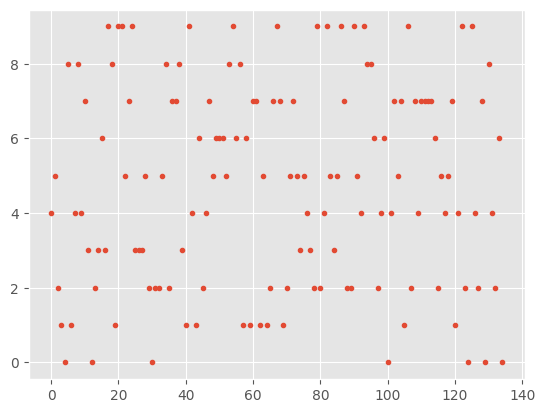

In [34]:
#Visualizing product clusters in subset of data
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [35]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Result

In [36]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 bracket
 shelf
 home
 wall
 vinyl
 tubing
 clock
 color
 decor
 unit
Cluster 1:
 light
 led
 power
 watt
 cabinet
 lighting
 wall
 volt
 plan
 impact
Cluster 2:
 water
 easy
 watering
 handle
 lawn
 stainless
 design
 features
 resist
 heavy
Cluster 3:
 solar
 masonry
 bamboo
 expanded
 non
 threaded
 tampico
 tasks
 fencing
 white
Cluster 4:
 post
 privacy
 ft
 ladder
 fence
 spline
 vinyl
 poles
 pruner
 fiberglass
Cluster 5:
 air
 cooling
 cooking
 control
 ft
 gas
 heat
 grill
 metal
 cool
Cluster 6:
 concrete
 ants
 10
 stake
 ft
 used
 head
 sprinkler
 plastic
 product
Cluster 7:
 paint
 bronze
 wood
 base
 tape
 ft
 brush
 primed
 concrete
 shade
Cluster 8:
 storage
 recommended
 stakes
 solid
 smooth
 step
 wall
 shelves
 base
 easy
Cluster 9:
 door
 patio
 insulation
 frame
 wicker
 weather
 rust
 steel
 film
 shrink


In [38]:
#Predicting clusters based on key search words
def show_recommendations(product):
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    print_cluster(prediction[0])

In [39]:
#Keyword : cutting tool
show_recommendations("cutting tool")

Cluster 2:
 water
 easy
 watering
 handle
 lawn
 stainless
 design
 features
 resist
 heavy


In [41]:
#Keyword : bed
show_recommendations("paint")

Cluster 7:
 paint
 bronze
 wood
 base
 tape
 ft
 brush
 primed
 concrete
 shade


In [42]:
#Keyword : spray paint
show_recommendations("Air")

Cluster 5:
 air
 cooling
 cooking
 control
 ft
 gas
 heat
 grill
 metal
 cool


In [43]:
#Keyword : spray paint
show_recommendations("table")

Cluster 9:
 door
 patio
 insulation
 frame
 wicker
 weather
 rust
 steel
 film
 shrink
